In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('online_shoppers_intention (1).csv')

In [14]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False


In [6]:
df['ProductRelated_Duration'].describe()

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

In [5]:
stats.trim_mean(df['ProductRelated_Duration'], 0.01)

1087.651655867563

In [7]:
stats.trim_mean(df['ProductRelated_Duration'], 0.05)

925.059131963654

In [8]:
stats.trim_mean(df['ProductRelated_Duration'], 0.1)

820.0794383306499

In [22]:
stats.yeojohnson(df['ProductRelated_Duration'])[1]

0.22894560912654202

mean    1194.746220
std     1913.669288
Name: ProductRelated_Duration, dtype: float64

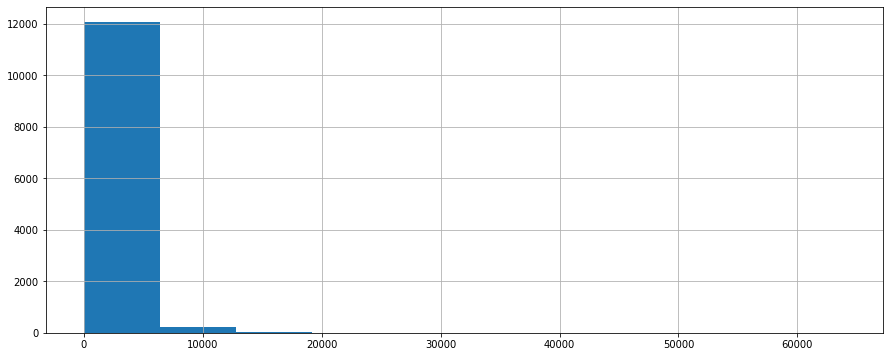

In [5]:
df['ProductRelated_Duration'].hist(figsize=(15, 6))
df['ProductRelated_Duration'].agg(['mean', 'std'])

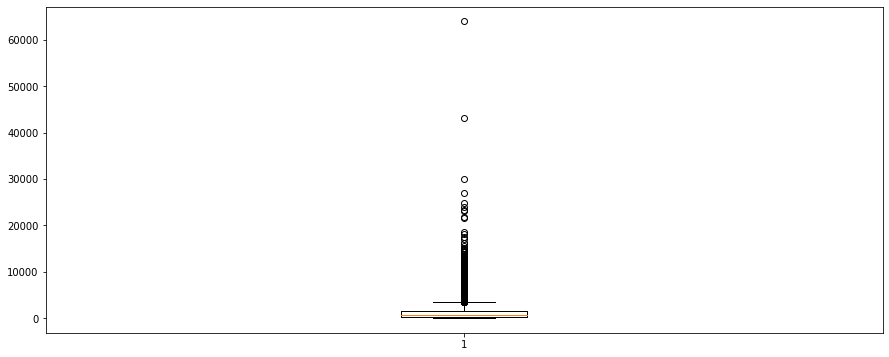

In [11]:
plt.figure(figsize=(15, 6))
plt.boxplot(df['ProductRelated_Duration'])
plt.show()

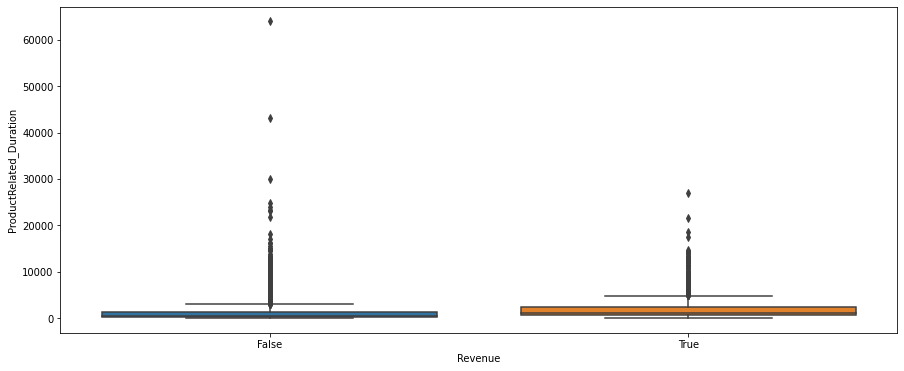

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Revenue', y='ProductRelated_Duration')
plt.show()

In [14]:
df.loc[df['ProductRelated_Duration'] > 50000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8071,5,3398.75,6,2549.375,449,63973.52223,0.000764,0.027701,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


In [49]:
df['total_time_conv'] = ((df['Administrative_Duration'] / 3600) + (df['Informational_Duration'] / 3600) + (df['ProductRelated_Duration'] / 3600))

In [50]:
df['total_session'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

In [47]:
(63973.52223 / 3600) + (2549.375 / 3600) + (3398.75 / 3600)

19.422679786111114

In [52]:
df['total_time_conv'].describe()

count    12330.000000
mean         0.363899
std          0.566056
min          0.000000
25%          0.061667
50%          0.188889
75%          0.451919
max         19.422680
Name: total_time_conv, dtype: float64

In [60]:
threshold = df['total_time_conv'].quantile(0.99)

In [62]:
df.loc[df['total_time_conv'] > 10, :]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time_conv,total_session
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False,13.291922,746
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False,19.422680,460


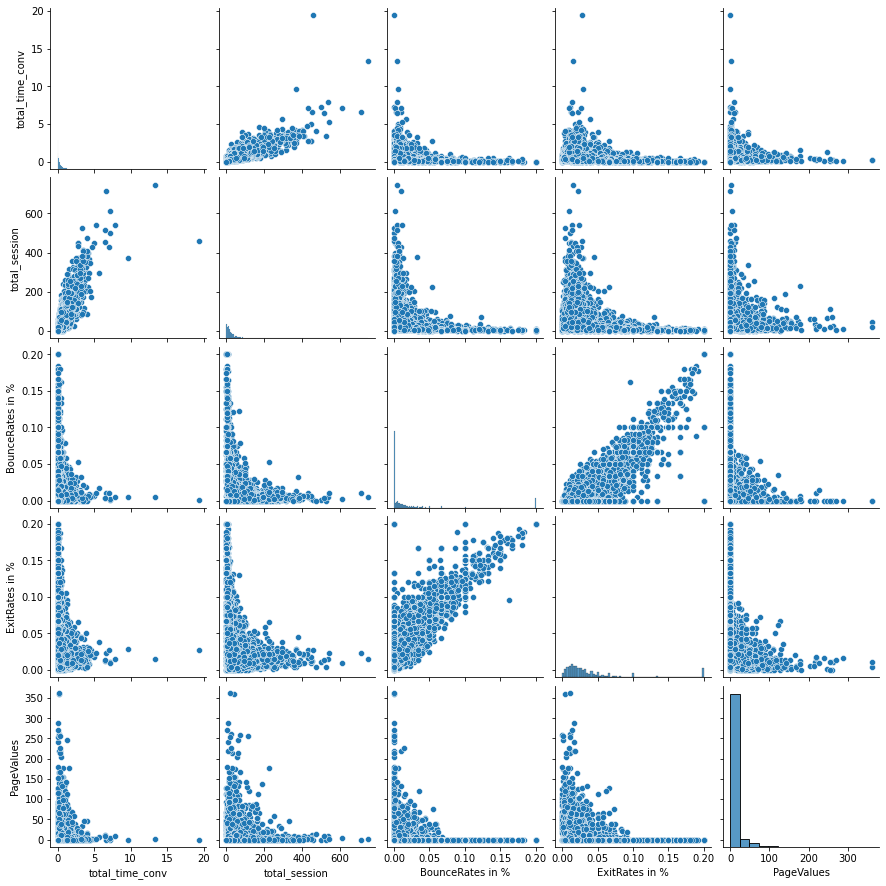

In [51]:
sns.pairplot(df[['total_time_conv', 'total_session', 'BounceRates in %', 'ExitRates in %', 'PageValues']])

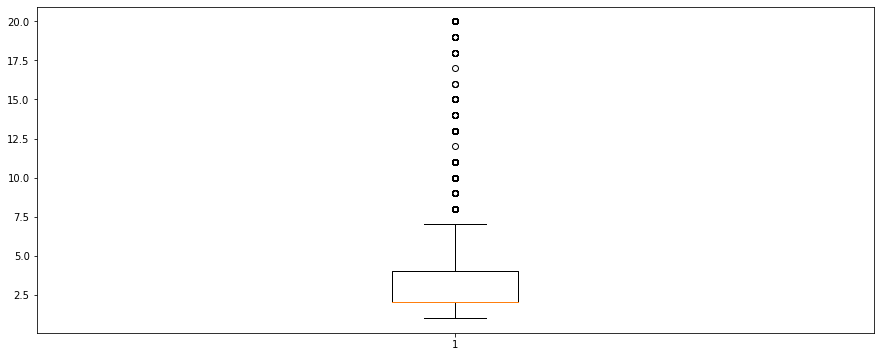

In [15]:
plt.figure(figsize=(15, 6))
plt.boxplot(df['TrafficType'])
plt.show()

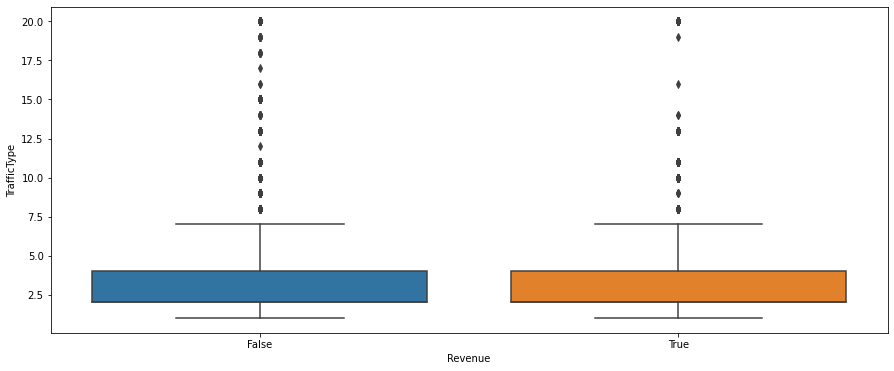

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Revenue', y='TrafficType')
plt.show()

<AxesSubplot:xlabel='TrafficType', ylabel='Count'>

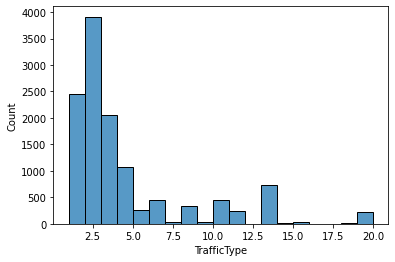

In [19]:
sns.histplot(data=df, x='TrafficType', binwidth=1)

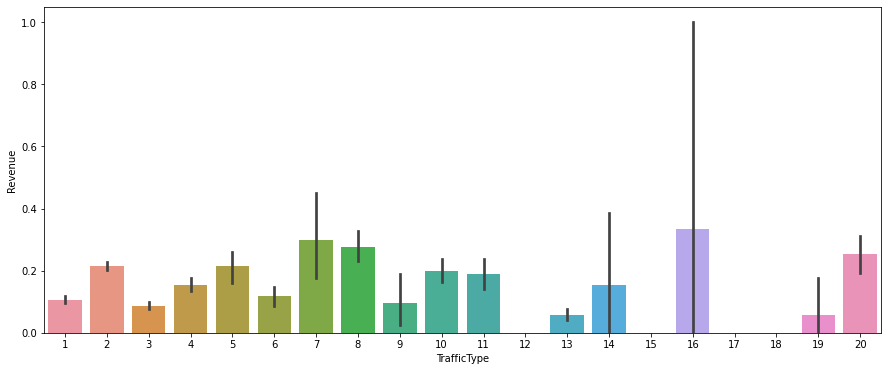

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='TrafficType', y='Revenue')
plt.show()

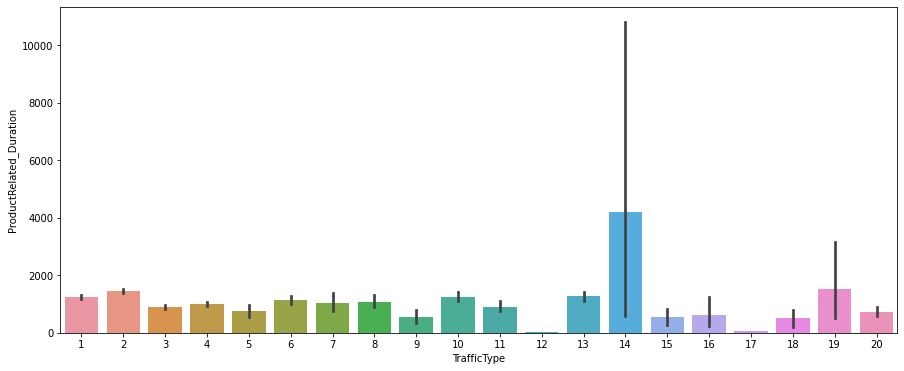

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='TrafficType', y='ProductRelated_Duration')
plt.show()

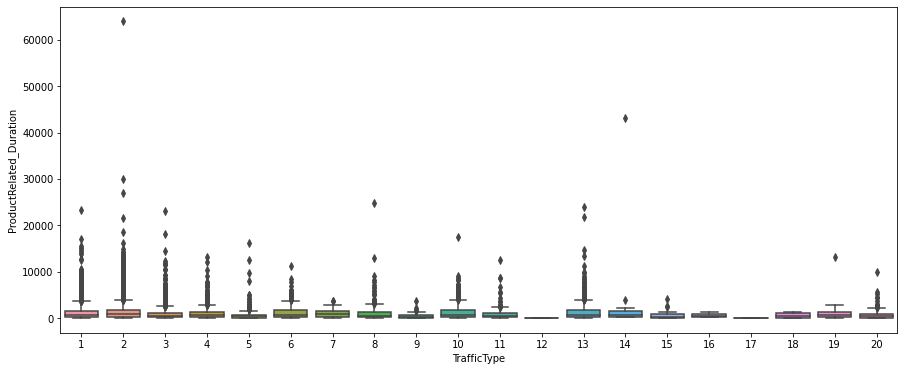

In [45]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='TrafficType', y='ProductRelated_Duration')
plt.show()

In [22]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [38]:
range_ = np.histogram_bin_edges(df['TrafficType'], bins='fd')
range_

array([ 1.        ,  1.17272727,  1.34545455,  1.51818182,  1.69090909,
        1.86363636,  2.03636364,  2.20909091,  2.38181818,  2.55454545,
        2.72727273,  2.9       ,  3.07272727,  3.24545455,  3.41818182,
        3.59090909,  3.76363636,  3.93636364,  4.10909091,  4.28181818,
        4.45454545,  4.62727273,  4.8       ,  4.97272727,  5.14545455,
        5.31818182,  5.49090909,  5.66363636,  5.83636364,  6.00909091,
        6.18181818,  6.35454545,  6.52727273,  6.7       ,  6.87272727,
        7.04545455,  7.21818182,  7.39090909,  7.56363636,  7.73636364,
        7.90909091,  8.08181818,  8.25454545,  8.42727273,  8.6       ,
        8.77272727,  8.94545455,  9.11818182,  9.29090909,  9.46363636,
        9.63636364,  9.80909091,  9.98181818, 10.15454545, 10.32727273,
       10.5       , 10.67272727, 10.84545455, 11.01818182, 11.19090909,
       11.36363636, 11.53636364, 11.70909091, 11.88181818, 12.05454545,
       12.22727273, 12.4       , 12.57272727, 12.74545455, 12.91

mean    27.980372
std     20.294788
Name: ProductRelated_Duration, dtype: float64

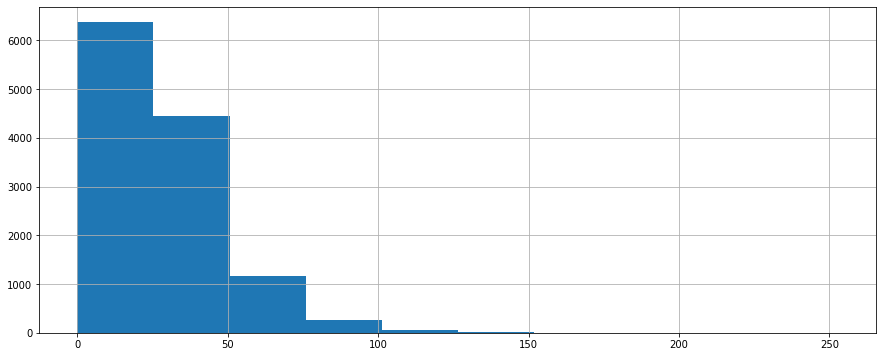

In [4]:
np.sqrt(df['ProductRelated_Duration']).hist(figsize=(15, 6))
np.sqrt(df['ProductRelated_Duration']).agg(['mean', 'std'])

(array([1.126e+03, 1.993e+03, 3.576e+03, 3.379e+03, 1.650e+03, 4.740e+02,
        1.160e+02, 1.200e+01, 2.000e+00, 2.000e+00]),
 array([ 0.        ,  5.06599178, 10.13198355, 15.19797533, 20.26396711,
        25.32995888, 30.39595066, 35.46194244, 40.52793421, 45.59392599,
        50.65991777]),
 <BarContainer object of 10 artists>)

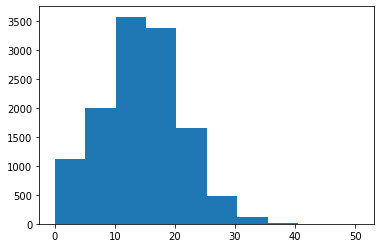

In [7]:
plt.hist(stats.yeojohnson(df['ProductRelated_Duration'])[0])

mean    5.962529
std     2.043091
Name: ProductRelated_Duration, dtype: float64

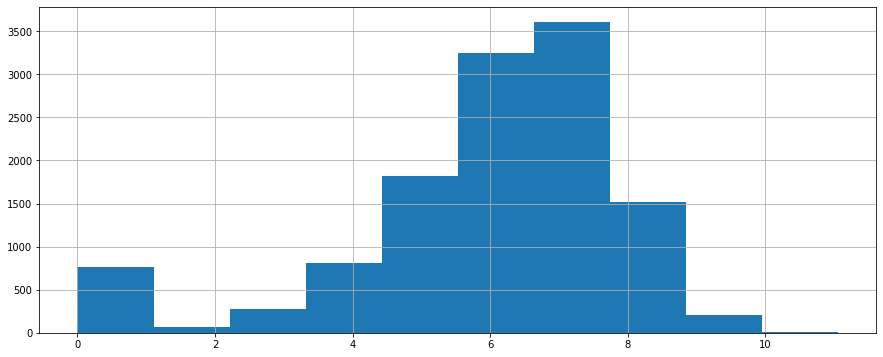

In [8]:
np.log1p(df['ProductRelated_Duration']).hist(figsize=(15, 6))
np.log1p(df['ProductRelated_Duration']).agg(['mean', 'std'])

In [26]:
df['ProductRelated_Duration_log'] = np.log1p(df['ProductRelated_Duration'])

In [33]:
Q1 = df['ProductRelated_Duration'].quantile(0.05)
Q3 = df['ProductRelated_Duration'].quantile(0.95)
IQR = df['ProductRelated_Duration'].apply(stats.iqr)

data_clean = df[~((df['ProductRelated_Duration'] < (Q1-1.5*IQR)) | (df['ProductRelated_Duration'] > (Q3+1.5*IQR)))]

print(f"Shape before removing outliers (5% - 95%) : {df['ProductRelated_Duration'].shape}")
print(f"Shape after removing outliers (5% - 95%) : {data_clean['ProductRelated_Duration'].shape}")

Shape before removing outliers (5% - 95%) : (12330,)
Shape after removing outliers (5% - 95%) : (11713,)


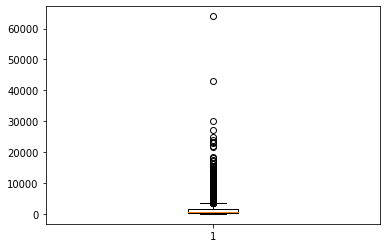

In [60]:
plt.boxplot(df['ProductRelated_Duration'])
plt.show()

In [34]:
Q1 = df['ProductRelated_Duration_log'].quantile(0.05)
Q3 = df['ProductRelated_Duration_log'].quantile(0.95)
IQR = df['ProductRelated_Duration_log'].apply(stats.iqr)

data_clean = df[~((df['ProductRelated_Duration_log'] < (Q1-1.5*IQR)) | (df['ProductRelated_Duration_log'] > (Q3+1.5*IQR)))]

print(f"Shape before removing outliers (5% - 95%) : {df['ProductRelated_Duration_log'].shape}")
print(f"Shape after removing outliers (5% - 95%) : {data_clean['ProductRelated_Duration_log'].shape}")

Shape before removing outliers (5% - 95%) : (12330,)
Shape after removing outliers (5% - 95%) : (11713,)


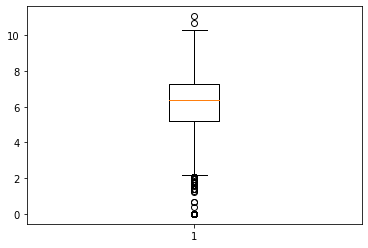

In [61]:
plt.boxplot(df['ProductRelated_Duration_log'])
plt.show()

In [35]:
df['ProductRelated_Duration_z_score'] = stats.zscore(df['ProductRelated_Duration'], ddof=0)
df['ProductRelated_Duration_log_z_score'] = stats.zscore(df['ProductRelated_Duration_log'], ddof=0)

In [57]:
df.loc[(df['ProductRelated_Duration_z_score'] > 3) | (df['ProductRelated_Duration_z_score'] < -3), :]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductRelated_Duration_log,ProductRelated_Duration_z_score,ProductRelated_Duration_log_z_score
66,4,44.000000,0,0.000000,90,6951.972222,0.002151,0.015013,0.000000,0.0,...,4,1,1,3,Returning_Visitor,False,False,8.846925,3.008597,1.411837
510,14,416.392857,6,449.333333,258,11301.204160,0.000000,0.007425,33.611792,0.0,...,2,4,9,2,Returning_Visitor,False,True,9.332753,5.281408,1.649638
799,10,316.140503,7,321.666667,287,12983.787710,0.000669,0.006998,1.088158,0.0,...,2,4,3,8,New_Visitor,False,False,9.471534,6.160688,1.717568
979,11,247.333333,2,369.000000,90,7221.000000,0.001031,0.003918,13.464063,0.0,...,2,2,3,8,Returning_Visitor,False,True,8.884887,3.149185,1.430419
1037,1,24.000000,3,125.500000,65,8646.000000,0.000000,0.011765,0.000000,0.0,...,2,2,1,13,Returning_Visitor,True,False,9.064968,3.893858,1.518564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,4,28.000000,3,37.833333,378,12003.317580,0.003655,0.023353,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,False,9.393022,5.648316,1.679138
12178,26,1561.717567,9,503.722222,183,9676.093180,0.011055,0.014200,19.567464,0.0,...,3,2,2,13,Returning_Visitor,False,True,9.177517,4.432161,1.573654
12179,10,298.581761,0,0.000000,210,8115.845852,0.008399,0.030193,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,False,9.001697,3.616811,1.487594
12282,0,0.000000,0,0.000000,125,7453.766667,0.001626,0.013132,0.000000,0.0,...,2,2,3,2,Returning_Visitor,False,False,8.916609,3.270823,1.445946


In [58]:
df[df['ProductRelated_Duration_z_score'] < -3]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductRelated_Duration_log,ProductRelated_Duration_z_score,ProductRelated_Duration_log_z_score


In [40]:
def plot_anomaly(duration_data, threshold):
    duration_data = duration_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(duration_data), len(duration_data))
    mask_outlier = (duration_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], duration_data[~mask_outlier],'o', color='b', label='not anomalies')
    plt.plot(ranks[mask_outlier], duration_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. Product Duration', fontweight='bold')
    plt.xlabel('Product Duration')
    plt.ylabel('Z-score')
    plt.show()

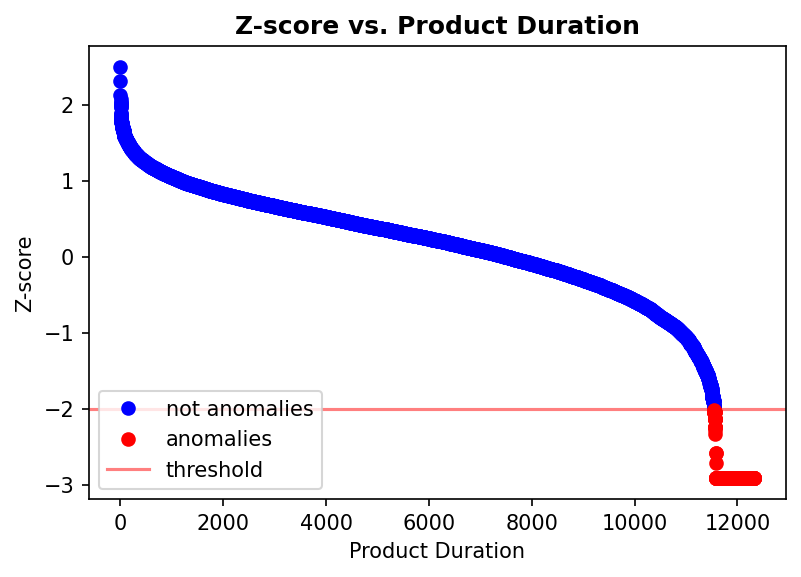

In [49]:
plot_anomaly(df['ProductRelated_Duration_log_z_score'], -2)

In [80]:
product_duration_zscore = df.loc[~(df['ProductRelated_Duration_z_score'] > 3), ['ProductRelated_Duration']]
product_duration_zscore

,ProductRelated_Duration
0,0.000000
1,64.000000
2,0.000000
3,2.666667
4,627.500000
...,...
12325,1783.791667
12326,465.750000
12327,184.250000
12328,346.000000


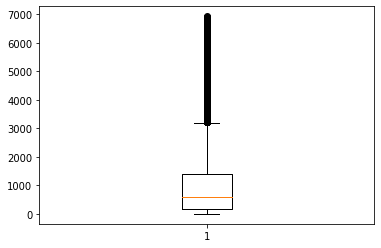

In [76]:
plt.boxplot(product_duration)
plt.show()

In [79]:
product_duration_log_zscore = df.loc[~(df['ProductRelated_Duration_log_z_score'] > 3), ['ProductRelated_Duration_log']]
product_duration_log_zscore

,ProductRelated_Duration_log
0,0.000000
1,4.174387
2,0.000000
3,1.299283
4,6.443336
...,...
12325,7.487057
12326,6.145794
12327,5.221706
12328,5.849325


In [103]:
product_duration_log_zscore[product_duration_log_zscore['ProductRelated_Duration_log'] < 0]

,ProductRelated_Duration_log


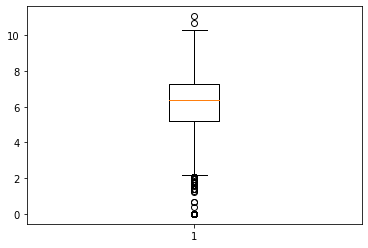

In [78]:
plt.boxplot(product_duration_log_zscore)
plt.show()

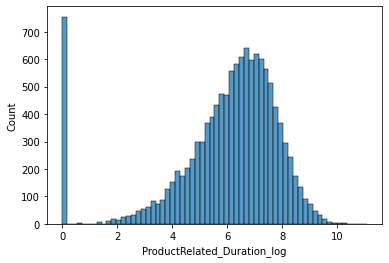

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(data=df, x='ProductRelated_Duration_log')

# Add a vertical line based on a condition
plt.axvline(x=df[df['ProductRelated_Duration_log_z_score'] < -3]['ProductRelated_Duration_log'].min(), color='red')
plt.axvline(x=df[df['ProductRelated_Duration_log_z_score'] > 3]['ProductRelated_Duration_log'].min(), color='red')

# Display the plot
plt.show()

In [82]:
from scipy.stats import median_abs_deviation, trim_mean, wilcoxon, kruskal

In [83]:
mad = median_abs_deviation(df['ProductRelated_Duration'])
print("MAD:", mad)

MAD: 500.93690474999994


In [92]:
wilcoxon_stat, wilcoxon_pval = wilcoxon(df['ProductRelated_Duration'])
print("Wilcoxon Signed-Rank Test Statistic:", wilcoxon_stat)
print("Wilcoxon Signed-Rank Test p-value:", wilcoxon_pval)

Wilcoxon Signed-Rank Test Statistic: 0.0
Wilcoxon Signed-Rank Test p-value: 0.0


In [84]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [88]:
mod_zscore_product_duration, mad_product_duration = modified_zscore(df['ProductRelated_Duration'])
product_duration = df.assign(mod_zscore=mod_zscore_product_duration)
product_duration

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductRelated_Duration_log,ProductRelated_Duration_z_score,ProductRelated_Duration_log_z_score,mod_zscore
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,Returning_Visitor,False,False,0.000000,-0.624348,-2.918505,-0.806444
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,1,2,Returning_Visitor,False,False,4.174387,-0.590903,-0.875249,-0.720270
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,9,3,Returning_Visitor,False,False,0.000000,-0.624348,-2.918505,-0.806444
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,2,2,4,Returning_Visitor,False,False,1.299283,-0.622954,-2.282539,-0.802853
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,1,4,Returning_Visitor,True,False,6.443336,-0.296430,0.235343,0.038459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,6,1,1,Returning_Visitor,True,False,7.487057,0.307822,0.746217,1.595358
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,2,1,8,Returning_Visitor,True,False,6.145794,-0.380957,0.089703,-0.179331
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,2,1,13,Returning_Visitor,True,False,5.221706,-0.528063,-0.362614,-0.558359
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,3,11,Returning_Visitor,False,False,5.849325,-0.443536,-0.055411,-0.340569


In [99]:
clean_data = product_duration.loc[~(product_duration['mod_zscore'] > 3), :]
clean_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductRelated_Duration_log,ProductRelated_Duration_z_score,ProductRelated_Duration_log_z_score,mod_zscore
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,Returning_Visitor,False,False,0.000000,-0.624348,-2.918505,-0.806444
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,1,2,Returning_Visitor,False,False,4.174387,-0.590903,-0.875249,-0.720270
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,9,3,Returning_Visitor,False,False,0.000000,-0.624348,-2.918505,-0.806444
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,2,2,4,Returning_Visitor,False,False,1.299283,-0.622954,-2.282539,-0.802853
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,1,4,Returning_Visitor,True,False,6.443336,-0.296430,0.235343,0.038459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,6,1,1,Returning_Visitor,True,False,7.487057,0.307822,0.746217,1.595358
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,2,1,8,Returning_Visitor,True,False,6.145794,-0.380957,0.089703,-0.179331
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,2,1,13,Returning_Visitor,True,False,5.221706,-0.528063,-0.362614,-0.558359
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,3,11,Returning_Visitor,False,False,5.849325,-0.443536,-0.055411,-0.340569


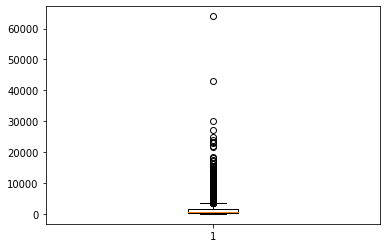

In [101]:
plt.boxplot(product_duration['ProductRelated_Duration'])
plt.show()

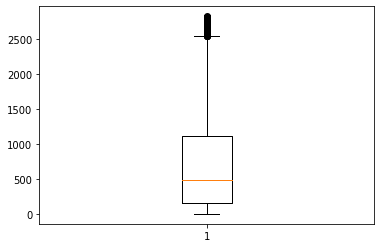

In [102]:
plt.boxplot(clean_data['ProductRelated_Duration'])
plt.show()

In [89]:
def plot_anomaly_goals_2(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outliers = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outliers], score_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], score_data[~mask_outliers],'o', color='b', label='typical player')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Player')
    plt.ylabel('Modified z-score')
    plt.show()

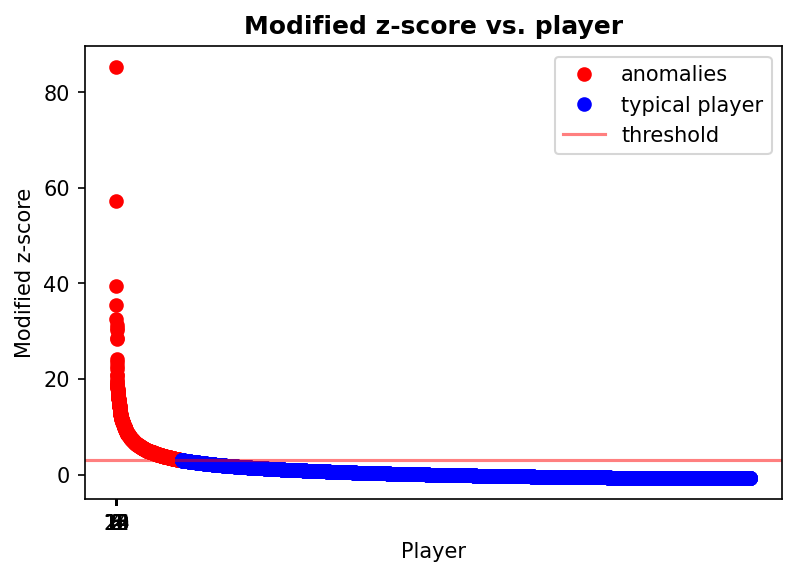

In [91]:
plot_anomaly_goals_2(product_duration['mod_zscore'], 3)

In [4]:
df['VisitorType'] = pd.factorize(df['VisitorType'])[0]
df['Month'] = pd.factorize(df['Month'])[0]

In [5]:
df['Weekend'] = df['Weekend'].astype('int64')
df['Revenue'] = df['Revenue'].astype('int64')

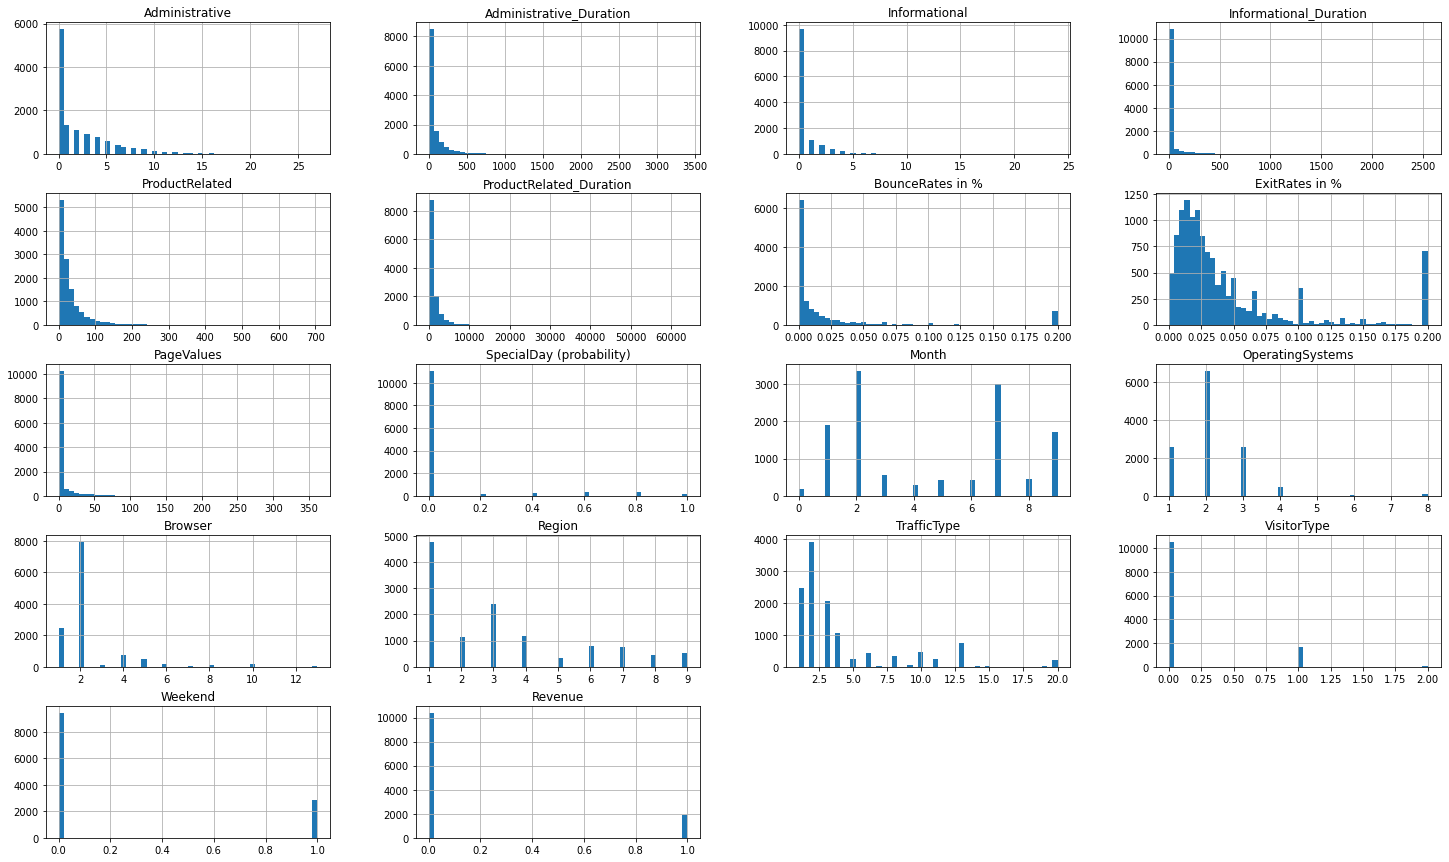

In [29]:
df.hist(bins=50, figsize=(25, 15))
plt.show()

In [6]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y.values, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression(max_iter=10000, random_state=123, class_weight='balanced')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1976
           1       0.70      0.54      0.61       490

    accuracy                           0.86      2466
   macro avg       0.79      0.74      0.76      2466
weighted avg       0.85      0.86      0.86      2466



In [35]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = df.apply(stats.iqr)

data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

print(f"Shape before removing outliers (1% - 99%) : {df.shape}")
print(f"Shape after removing outliers (1% - 99%) : {data_clean.shape}")

Shape before removing outliers (1% - 99%) : (12330, 18)
Shape after removing outliers (1% - 99%) : (11711, 18)


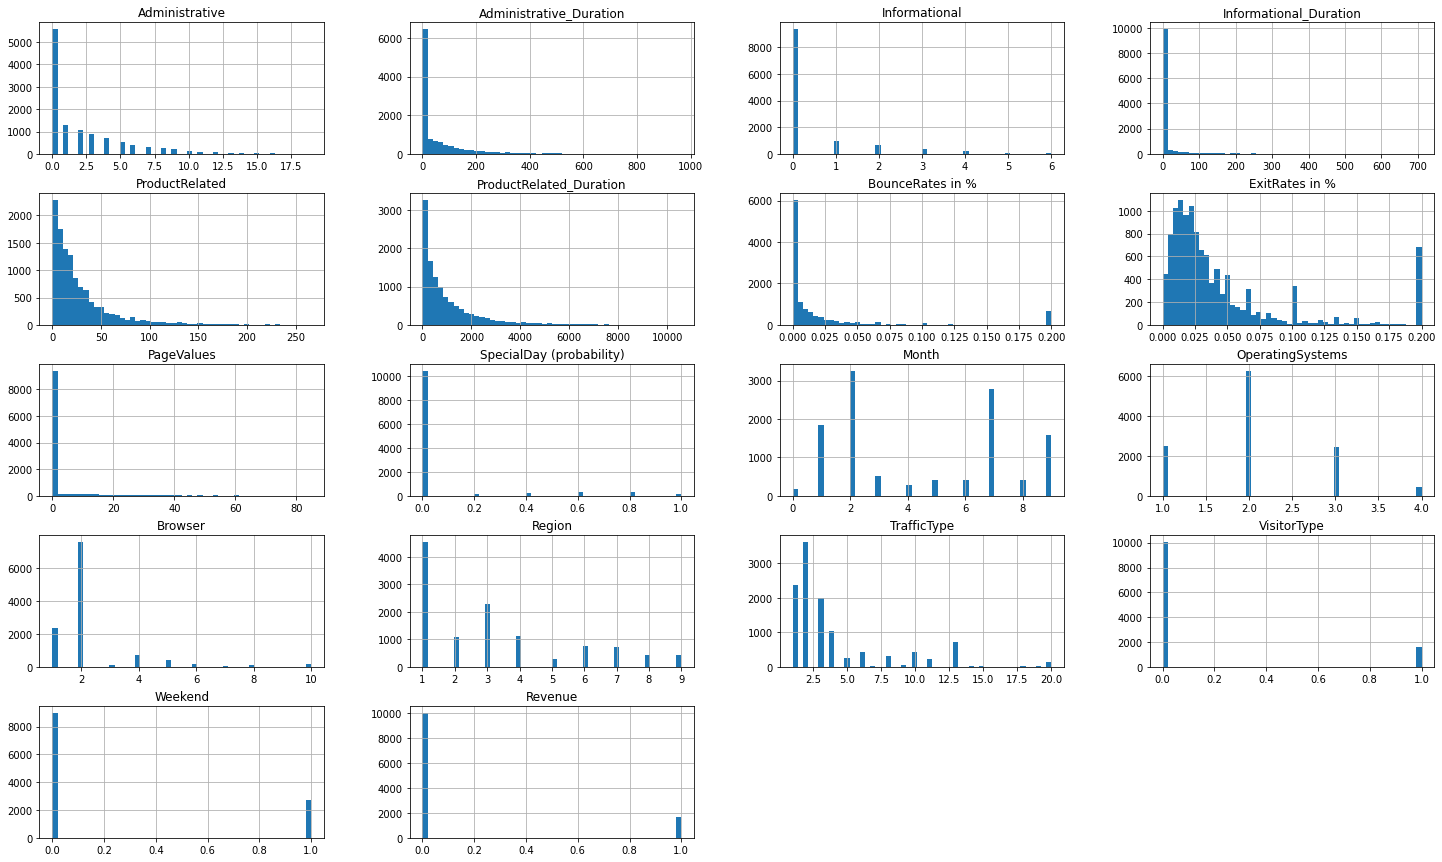

In [36]:
data_clean.hist(bins=50, figsize=(25, 15))
plt.show()

In [37]:
X = data_clean.drop('Revenue', axis=1)
y = data_clean['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y.values, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression(max_iter=10000, random_state=123, class_weight='balanced')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1886
           1       0.77      0.57      0.65       457

    accuracy                           0.88      2343
   macro avg       0.84      0.76      0.79      2343
weighted avg       0.88      0.88      0.88      2343



In [50]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = df.apply(stats.iqr)

data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

print(f"Shape before removing outliers (5% - 95%) : {df.shape}")
print(f"Shape after removing outliers (5% - 95%) : {data_clean.shape}")

Shape before removing outliers (5% - 95%) : (12330, 18)
Shape after removing outliers (5% - 95%) : (9320, 18)


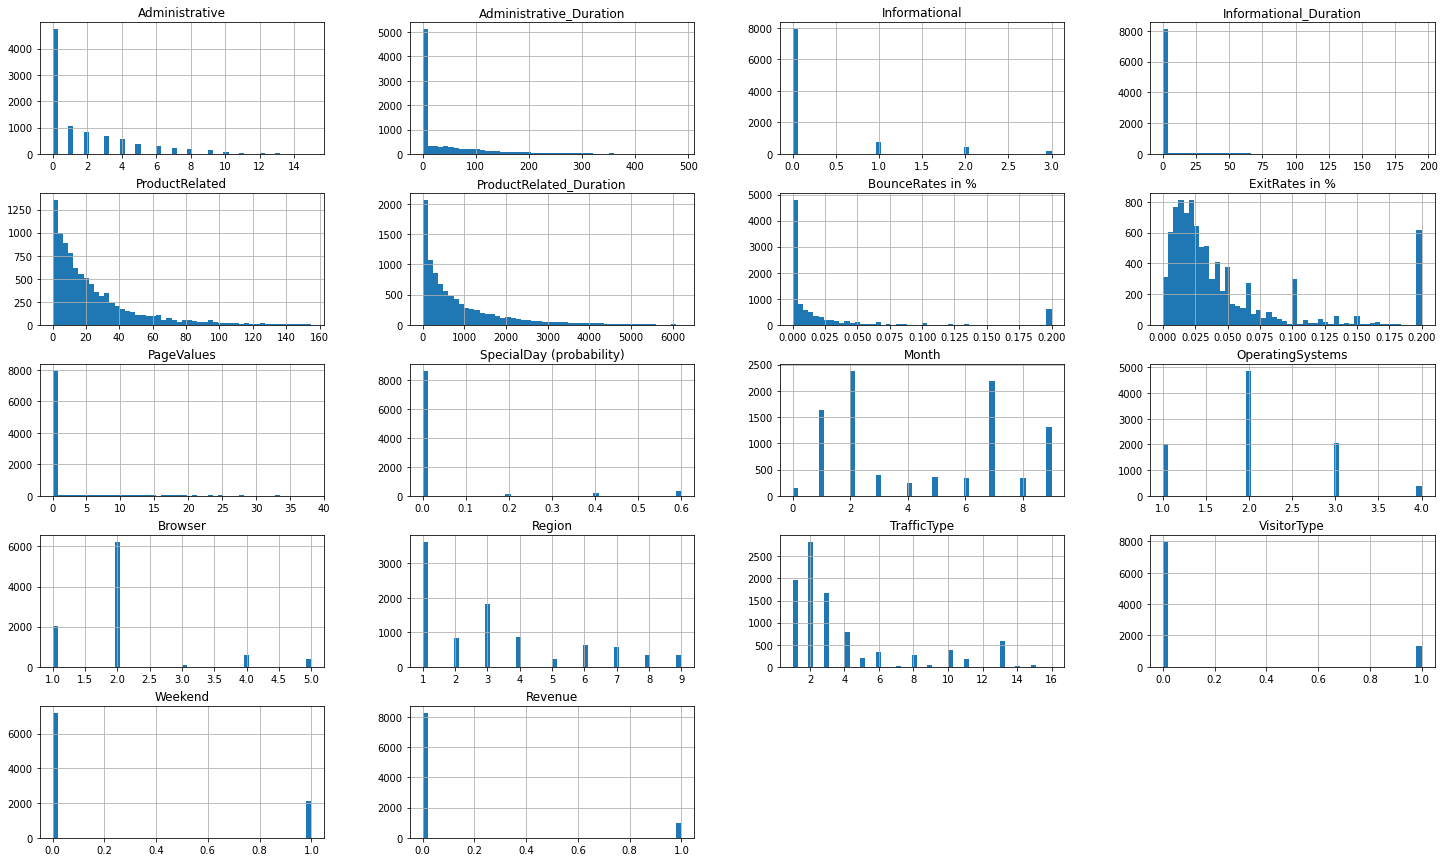

In [51]:
data_clean.hist(bins=50, figsize=(25, 15))
plt.show()

In [104]:
df.loc[df['Revenue'] == False, ['PageValues']]

,PageValues
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
12325,12.241717
12326,0.000000
12327,0.000000
12328,0.000000


In [110]:
df.loc[df['Revenue'] == False, ['PageValues', 'Administrative_Duration', 'Informational_Duration', 
                                'ProductRelated_Duration']]

,PageValues,Administrative_Duration,Informational_Duration,ProductRelated_Duration
0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,64.000000
2,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,2.666667
4,0.000000,0.0,0.0,627.500000
...,...,...,...,...
12325,12.241717,145.0,0.0,1783.791667
12326,0.000000,0.0,0.0,465.750000
12327,0.000000,0.0,0.0,184.250000
12328,0.000000,75.0,0.0,346.000000


In [108]:
df.loc[df['Revenue'] == False, ['PageValues', 'Administrative_Duration', 'Informational_Duration', 
                                'ProductRelated_Duration']].describe()

,PageValues,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,10422.000000,10422.000000,10422.000000,10422.000000
mean,1.975998,73.740111,30.236237,1069.987809
std,9.072424,171.017970,133.909306,1803.797757
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,151.000000
50%,0.000000,0.000000,0.000000,510.190000
75%,0.000000,83.000000,0.000000,1331.816667
max,246.758590,3398.750000,2549.375000,63973.522230


In [109]:
df.loc[(df['Revenue'] == False) & (df['PageValues'] > 1), ['PageValues']]

,PageValues
29,54.179764
57,19.447079
62,38.308493
185,8.000741
189,46.530175
...,...
12285,7.147604
12287,44.219794
12307,39.519807
12319,3.685401


In [52]:
X = data_clean.drop('Revenue', axis=1)
y = data_clean['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y.values, test_size=0.2, random_state=42)

In [53]:
model = LogisticRegression(max_iter=10000, random_state=123, class_weight='balanced')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1521
           1       0.78      0.46      0.58       343

    accuracy                           0.88      1864
   macro avg       0.84      0.72      0.75      1864
weighted avg       0.87      0.88      0.86      1864



In [57]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,1,1,1,0,0,0


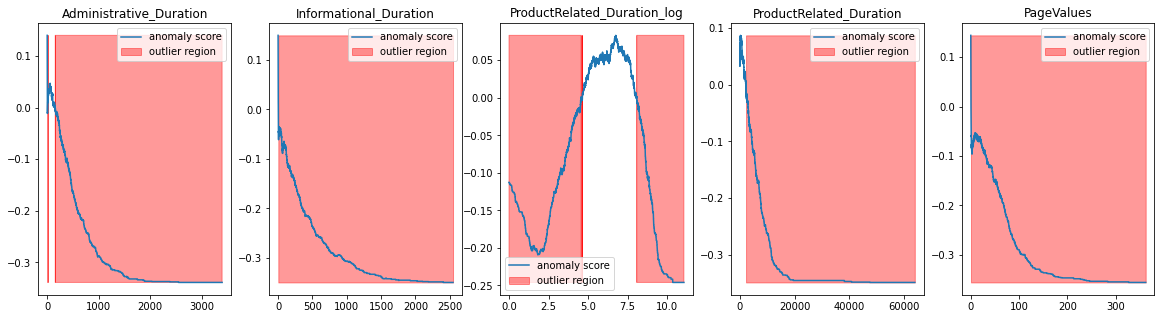

In [28]:
from sklearn.ensemble import IsolationForest
cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration_log', 'ProductRelated_Duration',
        'PageValues']
fig, axs = plt.subplots(1, 5, figsize=(20, 5), facecolor='w', edgecolor='k')

axs = axs.ravel()
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))
    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [64]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,4.566504,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.982143,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,4.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [66]:
df.groupby('Informational')['PageValues'].describe()

,count,mean,std,min,25%,50%,75%,max
Informational,,,,,,,,
0,9699.0,5.327895,18.621120,0.000000,0.000000,0.000000,0.000000,361.763742
1,1041.0,8.001582,19.052072,0.000000,0.000000,0.000000,7.152750,177.771454
2,728.0,6.656923,16.393881,0.000000,0.000000,0.000000,5.972626,154.095539
3,380.0,9.711039,21.220398,0.000000,0.000000,0.000000,9.467460,214.306663
4,222.0,7.923862,13.615916,0.000000,0.000000,0.750373,10.089975,86.790826
5,99.0,7.750162,14.035218,0.000000,0.000000,0.000000,9.470732,83.786512
6,78.0,12.243089,24.809460,0.000000,0.000000,1.435154,13.581872,129.101374
7,36.0,5.271866,13.281346,0.000000,0.000000,0.075325,4.304828,68.913643
8,14.0,16.436870,25.176938,0.000000,2.264956,5.947043,15.540104,79.484039


In [67]:
df.groupby('BounceRates in %')['PageValues'].describe()

,count,mean,std,min,25%,50%,75%,max
BounceRates in %,,,,,,,,
0.000000,5518.0,8.215354,23.851912,0.000000,0.000000,0.000000,0.000000,361.763742
0.000027,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
0.000034,1.0,2.873955,NaN,2.873955,2.873955,2.873955,2.873955,2.873955
0.000038,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
0.000039,1.0,0.098621,NaN,0.098621,0.098621,0.098621,0.098621,0.098621
...,...,...,...,...,...,...,...,...
0.175000,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
0.176923,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
0.180000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
df['BounceRates in %'].describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates in %, dtype: float64

In [72]:
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

In [77]:
df.loc[(df['BounceRates in %'] == 0) & (df['PageValues'] == 0) & (df['ProductRelated_Duration'] == 0), ['PageValues', 'Revenue', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates in %']]

,PageValues,Revenue,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates in %
445,0.0,0,279.00,0.00,0.0,0.050000
910,0.0,0,539.50,0.00,0.0,0.050000
1317,0.0,0,0.00,0.00,0.0,0.200000
1431,0.0,0,124.00,0.00,0.0,0.033333
1615,0.0,0,4.00,0.00,0.0,0.066667
1627,0.0,0,0.00,0.00,0.0,0.200000
2038,0.0,0,0.00,0.00,0.0,0.200000
2046,0.0,0,0.00,0.00,0.0,0.100000
2345,0.0,0,0.00,0.00,0.0,0.100000
2991,0.0,0,0.00,0.00,0.0,0.200000


<AxesSubplot:xlabel='ExitRates in %', ylabel='BounceRates in %'>

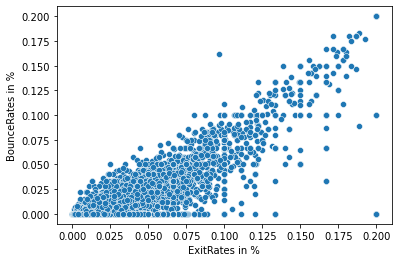

In [78]:
sns.scatterplot(data=df, x='ExitRates in %', y='BounceRates in %')

In [79]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,1,1,1,0,0,0


In [92]:
frame = df.groupby(['Administrative', 'Informational', 'ProductRelated'])[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues', 'ExitRates in %', 'BounceRates in %']].mean()
frame

Administrative_Duration  \
Administrative Informational ProductRelated                            
0              0             0                              0.000000   
                             1                              0.000000   
                             2                              0.000000   
                             3                              0.000000   
                             4                              0.000000   
...                                                              ...   
24             5             34                           876.233333   
               6             178                          290.860369   
                             189                          468.100663   
26             9             183                         1561.717567   
27             2             584                          853.735949   

                                             Informational_Duration  \
Administrative Informational ProductRelated                           
0              0             0                             0.000000   
                             1                             0.000000   
                             2                             0.000000   
                             3                             0.000000   
                             4                             0.000000   
...                                                             ...   
24             5             34                          625.500000   
               6             178                         529.700000   
                             189                         191.866667   
26             9             183                         503.722222   
27             2             584                         126.500000   

                                             ProductRelated_Duration  \
Administrative Informational ProductRelated                            
0              0             0                              0.000000   
                             1                             13.965546   
                             2                             60.417859   
                             3                            118.480813   
                             4                            158.441187   
...                                                              ...   
24             5             34                          1588.666667   
               6             178                         4339.534423   
                             189                         3428.527381   
26             9             183                         9676.093180   
27             2             584                        24844.156200   

                                             PageValues  ExitRates in %  \
Administrative Informational ProductRelated                               
0              0             0                 0.000000        0.196970   
                             1                 0.183993        0.191400   
                             2                 0.219656        0.119900   
                             3                 0.843937        0.092056   
                             4                 0.747517        0.076977   
...                                                 ...             ...   
24             5             34                0.000000        0.013801   
               6             178               6.149344        0.015263   
                             189               0.870148        0.043831   
26             9             183              19.567464        0.014200   
27             2             584               4.511100        0.009347   

                                             BounceRates in %  
Administrative Informational ProductRelated                    
0              0             0                       0.196667  
                             1                       0.183362  
               

In [93]:
frame = frame.reset_index()
frame['total_duration'] = frame['Administrative_Duration'] + frame['Informational_Duration'] + frame['ProductRelated_Duration']
frame['total_page_view'] = frame['Administrative'] + frame['Informational'] + frame['ProductRelated']

<AxesSubplot:xlabel='PageValues', ylabel='total_duration'>

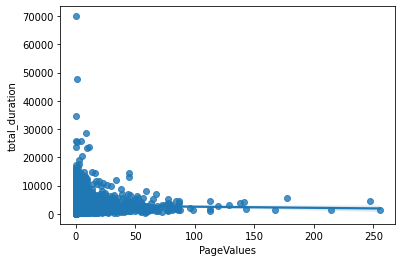

In [94]:
sns.regplot(data=frame, y='total_duration', x='PageValues')

<AxesSubplot:xlabel='PageValues', ylabel='total_page_view'>

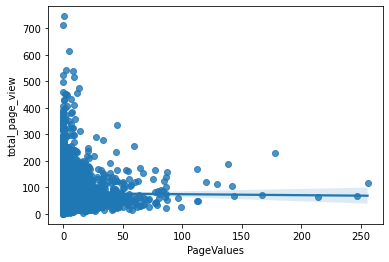

In [95]:
sns.regplot(data=frame, y='total_page_view', x='PageValues')

In [96]:
frame.loc[frame['PageValues'] == 0, :]

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,ExitRates in %,BounceRates in %,total_duration,total_page_view
0,0,0,0,0.000000,0.00,0.000000,0.0,0.196970,0.196667,0.000000,0
40,0,0,40,0.000000,0.00,1564.608110,0.0,0.032616,0.011553,1564.608110,40
46,0,0,46,0.000000,0.00,1900.961905,0.0,0.025214,0.009783,1900.961905,46
52,0,0,52,0.000000,0.00,1807.176292,0.0,0.027845,0.006397,1807.176292,52
56,0,0,56,0.000000,0.00,2500.045675,0.0,0.021496,0.006004,2500.045675,56
...,...,...,...,...,...,...,...,...,...,...,...
3102,18,3,247,257.562500,70.25,10415.325660,0.0,0.029681,0.011229,10743.138160,268
3103,18,4,178,514.075000,67.50,6630.479365,0.0,0.010805,0.003646,7212.054365,200
3116,21,3,170,157.888333,84.80,3888.278636,0.0,0.004515,0.000000,4130.966969,194
3124,23,5,88,335.130952,399.80,1839.098106,0.0,0.031588,0.015759,2574.029058,116


<AxesSubplot:xlabel='PageValues', ylabel='ExitRates in %'>

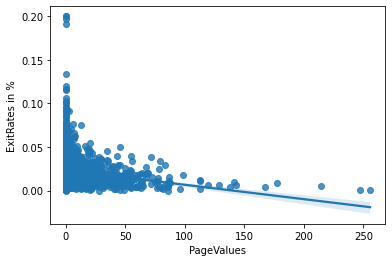

In [97]:
sns.regplot(data=frame, y='ExitRates in %', x='PageValues')

<AxesSubplot:xlabel='PageValues', ylabel='BounceRates in %'>

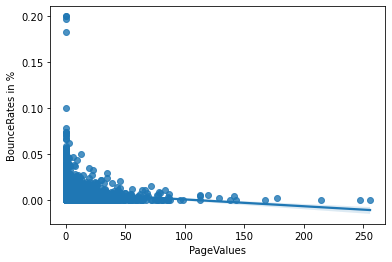

In [98]:
sns.regplot(data=frame, y='BounceRates in %', x='PageValues')

In [100]:
frame[['BounceRates in %', 'ExitRates in %', 'PageValues']].corr()

,BounceRates in %,ExitRates in %,PageValues
BounceRates in %,1.000000,0.822803,-0.110944
ExitRates in %,0.822803,1.000000,-0.184489
PageValues,-0.110944,-0.184489,1.000000


In [102]:
df.corr()['PageValues'].sort_values(ascending=False)

PageValues                  1.000000
Revenue                     0.492569
VisitorType                 0.120077
Administrative              0.098990
Administrative_Duration     0.067608
ProductRelated              0.056282
Month                       0.055440
ProductRelated_Duration     0.052823
Informational               0.048632
Browser                     0.045592
Informational_Duration      0.030861
OperatingSystems            0.018508
TrafficType                 0.012532
Weekend                     0.012002
Region                      0.011315
SpecialDay (probability)   -0.063541
BounceRates in %           -0.119386
ExitRates in %             -0.174498
Name: PageValues, dtype: float64

In [103]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.078698,-0.006347,-0.025035,-0.005487,-0.033561,0.016680,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.045888,-0.007343,-0.015392,-0.005561,-0.014376,0.019120,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.060826,-0.009527,-0.038235,-0.029169,-0.034491,-0.058211,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.041282,-0.009579,-0.019285,-0.027144,-0.024675,-0.045372,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.137077,0.004290,-0.013146,-0.038122,-0.043064,-0.127916,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.124053,0.002976,-0.007380,-0.033091,-0.036377,-0.118273,0.007311,0.152373
BounceRates in %,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.059301,0.023823,-0.015772,-0.006485,0.078286,-0.114916,-0.046514,-0.150673
ExitRates in %,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.083028,0.014567,-0.004442,-0.008907,0.078616,-0.152678,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.055440,0.018508,0.045592,0.011315,0.012532,0.120077,0.012002,0.492569
SpecialDay (probability),-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.277549,0.012652,0.003499,-0.016098,0.052301,-0.086854,-0.016767,-0.082305


In [107]:
np.linalg.lstsq(df[['BounceRates in %']], df[['ExitRates in %']], rcond=None)

(array([[1.09272671]]), array([10.12971988]), 1, array([5.92105777]))

In [108]:
np.linalg.lstsq(df[['Revenue']], df[['Administrative']], rcond=None)

(array([[3.39360587]]), array([180156.40199162]), 1, array([43.68065934]))

In [110]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=df.query("Revenue==True")['Administrative'],
                       b=df.query("Revenue==False")['Administrative'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 3.5197598377784024e-54
We reject null hypothesis


In [111]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=df.query("Revenue==True")['Administrative'], 
                           x2=df.query("Revenue==False")['Administrative'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.0732701569861082e-54
We reject null hypothesis


In [112]:
ttest,pval = ttest_ind(a=df.query("Revenue==True")['Administrative_Duration'],
                       b=df.query("Revenue==False")['Administrative_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 2.146513634744256e-25
We reject null hypothesis


In [113]:
ztest ,pval = stests.ztest(x1=df.query("Revenue==True")['Administrative_Duration'], 
                           x2=df.query("Revenue==False")['Administrative_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.6824549959977114e-25
We reject null hypothesis


In [114]:
ttest,pval = ttest_ind(a=df.query("Revenue==True")['Informational'],
                       b=df.query("Revenue==False")['Informational'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 3.174034311262581e-26
We reject null hypothesis


In [115]:
ztest ,pval = stests.ztest(x1=df.query("Revenue==True")['Informational'], 
                           x2=df.query("Revenue==False")['Informational'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

2.4454383664129918e-26
We reject null hypothesis


In [116]:
ttest,pval = ttest_ind(a=df.query("Revenue==True")['Informational_Duration'],
                       b=df.query("Revenue==False")['Informational_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 5.282870860721332e-15
We reject null hypothesis


In [117]:
ztest ,pval = stests.ztest(x1=df.query("Revenue==True")['Informational_Duration'], 
                           x2=df.query("Revenue==False")['Informational_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

4.884369711485758e-15
We reject null hypothesis


In [118]:
ttest,pval = ttest_ind(a=df.query("Revenue==True")['ProductRelated'],
                       b=df.query("Revenue==False")['ProductRelated'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 3.2411873289223995e-70
We reject null hypothesis


In [119]:
ztest ,pval = stests.ztest(x1=df.query("Revenue==True")['ProductRelated'], 
                           x2=df.query("Revenue==False")['ProductRelated'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

4.270250011489427e-71
We reject null hypothesis


In [120]:
ttest,pval = ttest_ind(a=df.query("Revenue==True")['ProductRelated_Duration'],
                       b=df.query("Revenue==False")['ProductRelated_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 6.115338253467455e-65
We reject null hypothesis


In [121]:
ztest ,pval = stests.ztest(x1=df.query("Revenue==True")['ProductRelated_Duration'], 
                           x2=df.query("Revenue==False")['ProductRelated_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.08863060591944e-65
We reject null hypothesis


Features such as "Informational" and "ProductRelated" appear to have strong predictive power.

All features passed statistical significance tests.

Two new features were created here.

AllPageCount
AllPageCount_Duration

In [123]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,4.566504,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.982143,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,4.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [124]:
3398.750000 / 3600

0.9440972222222223

In [125]:
63973.522230 / 3600

17.77042284166667

In [127]:
10973.522230 / 3600

3.0482006194444446

In [128]:
9973.522230 / 3600

2.770422841666667

In [129]:
df.loc[df['ProductRelated_Duration'] > 10000, :]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
510,14,416.392857,6,449.333333,258,11301.20416,0.000000,0.007425,33.611792,0.0,1,2,4,9,2,0,0,1
799,10,316.140503,7,321.666667,287,12983.78771,0.000669,0.006998,1.088158,0.0,1,2,4,3,8,1,0,0
2133,1,92.000000,0,0.000000,117,13158.66667,0.006897,0.041810,0.000000,0.0,2,2,6,4,4,0,1,0
2564,12,203.471429,1,0.000000,220,11308.09795,0.001700,0.012415,0.673128,0.8,2,2,2,5,6,0,0,0
3561,5,66.966667,2,416.000000,291,12065.18135,0.001226,0.008660,9.013011,0.0,2,2,2,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11917,3,35.000000,3,32.500000,290,11240.97669,0.012383,0.024238,0.000000,0.0,7,3,2,1,13,0,1,0
11986,12,397.716667,3,431.333333,336,12595.62776,0.002377,0.013316,1.178990,0.0,7,2,2,1,11,0,0,1
11988,14,228.748539,6,121.583333,336,12166.69424,0.000000,0.012144,0.067050,0.0,7,2,2,7,2,0,0,1
12141,4,28.000000,3,37.833333,378,12003.31758,0.003655,0.023353,0.000000,0.0,7,2,2,1,2,0,0,0


In [130]:
def calculate_quantile(values, quantile):
    return np.percentile(values, quantile)

def analyze_edge_cases(bounce_rate, exit_rate):
    # Calculate quantiles for bounce rate and exit rate
    bounce_quantile = calculate_quantile(bounce_rate, 75)
    exit_quantile = calculate_quantile(exit_rate, 25)

    # Interpret the edge cases based on quantiles
    if bounce_rate > bounce_quantile and exit_rate < exit_quantile:
        print("Edge Case 1: High Bounce Rate, Low Exit Rate")
        # Additional actions or analysis for this edge case

    if bounce_rate < bounce_quantile and exit_rate > exit_quantile:
        print("Edge Case 2: Low Bounce Rate, High Exit Rate")
        # Additional actions or analysis for this edge case

    if bounce_rate < bounce_quantile and exit_rate < exit_quantile:
        print("Edge Case 3: High Page Values, Low Bounce Rate")
        # Additional actions or analysis for this edge case

analyze_edge_cases(df['BounceRates in %'], df['ExitRates in %'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [147]:
import numpy as np

def calculate_quantile(values, quantile):
    return np.percentile(values, quantile)

def analyze_edge_cases(bounce_rate, exit_rate):
    # Calculate quantiles for bounce rate and exit rate
    bounce_quantile = calculate_quantile(bounce_rate, 75)
    exit_quantile = calculate_quantile(exit_rate, 25)

    # Interpret the edge cases based on quantiles
    edge_case_1 = (bounce_rate > bounce_quantile) & (exit_rate < exit_quantile)
    edge_case_2 = (bounce_rate < bounce_quantile) & (exit_rate > exit_quantile)
    edge_case_3 = (bounce_rate < bounce_quantile) & (exit_rate < exit_quantile)
    edge_case_3 = (bounce_rate < bounce_quantile) & (exit_rate < exit_quantile)
    edge_case_3 = (bounce_rate < bounce_quantile) & (exit_rate < exit_quantile)
    edge_case_3 = (bounce_rate < bounce_quantile) & (exit_rate < exit_quantile)


    if edge_case_1.any():
        print("Edge Case 1: High Bounce Rate, Low Exit Rate")
        index_case_1 = df.loc[edge_case_1].index

    if edge_case_2.any():
        print("Edge Case 2: Low Bounce Rate, High Exit Rate")
        index_case_2 = df.loc[edge_case_2].index

    if edge_case_3.any():
        print("Edge Case 3: High Page Values, Low Bounce Rate")
        index_case_3 = df.loc[edge_case_3].index
        
    if edge_case_4.all():
        
        
    return (index_case_1, index_case_2, index_case_3)

# Example usage
bounce_rate = df['BounceRates in %']
exit_rate = df['ExitRates in %']

case_1, case_2, case_3 = analyze_edge_cases(bounce_rate, exit_rate)

Edge Case 1: High Bounce Rate, Low Exit Rate
Edge Case 2: Low Bounce Rate, High Exit Rate
Edge Case 3: High Page Values, Low Bounce Rate


In [148]:
case_1

Int64Index([274, 1189, 1956, 2361, 3297, 3795, 6434, 7403, 10050, 11102, 11834,
            11942],
           dtype='int64')

In [149]:
df.iloc[case_1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
274,0,0.000000,0,0.0,5,75.500000,0.020000,0.013333,0.0,0.0,1,1,1,2,9,0,1,0
1189,0,0.000000,0,0.0,7,251.666667,0.028571,0.011429,0.0,0.0,1,3,2,1,6,0,1,0
1956,1,38.000000,0,0.0,5,131.000000,0.033333,0.013333,0.0,0.0,1,1,2,1,9,1,1,0
2361,0,0.000000,1,33.0,25,972.250000,0.019231,0.012937,0.0,0.0,2,1,2,1,1,0,0,0
3297,1,26.000000,0,0.0,11,345.166667,0.022222,0.008889,0.0,0.0,2,1,1,4,3,0,0,0
3795,5,53.000000,0,0.0,38,2246.166667,0.016923,0.013932,0.0,0.2,2,1,1,3,3,0,0,0
6434,0,0.000000,0,0.0,9,249.410000,0.022222,0.005128,0.0,0.0,7,1,2,1,4,0,0,0
7403,1,12.000000,0,0.0,22,380.806667,0.019048,0.013333,0.0,0.0,5,1,2,3,2,0,0,0
10050,3,60.250000,0,0.0,8,131.583333,0.020000,0.013333,0.0,0.0,7,3,2,1,2,1,0,0
11102,4,229.250000,0,0.0,8,372.250000,0.022222,0.009524,0.0,0.0,9,1,2,1,8,0,0,0


In [150]:
df.iloc[case_2]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,0,2,2,1,2,0,0,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,0,2,2,1,3,0,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,0,2,2,2,3,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,0,2,4,1,2,0,0,0
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,0,1,1,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,7,2,2,1,1,0,0,0
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,9,4,6,1,1,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,0,0,0


In [151]:
df.iloc[case_3]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
17,0,0.00,0,0.0,13,334.966667,0.000000,0.007692,0.000000,0.0,0,1,1,1,4,0,1,0
19,0,0.00,0,0.0,20,2981.166667,0.000000,0.010000,0.000000,0.0,0,2,4,4,4,0,0,0
20,0,0.00,0,0.0,8,136.166667,0.000000,0.008333,0.000000,1.0,0,2,2,5,1,0,1,0
26,4,64.60,0,0.0,32,1135.444444,0.002857,0.009524,0.000000,0.0,0,2,2,1,3,0,0,0
40,1,9.00,0,0.0,46,4084.393939,0.000000,0.001795,0.000000,0.0,0,2,2,8,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12305,0,0.00,0,0.0,39,1168.619841,0.000000,0.009064,0.000000,0.0,7,1,1,4,3,0,0,0
12317,3,100.50,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,9,2,2,3,2,1,0,0
12319,0,0.00,0,0.0,21,1128.583333,0.000000,0.013043,3.685401,0.0,9,2,2,1,2,0,0,0
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,9,2,2,4,2,0,0,0


In [154]:
zero_br_and_er = np.where((df['BounceRates in %'] == 0) & (df['ExitRates in %'] == 0))
zero_br_and_er

(array([5457, 5494, 5505, 5533, 5636, 5673, 5775, 5814, 5821, 5930, 6017,
        6021, 6065, 6073, 6077, 6157, 6216, 6243, 6257, 6264, 6265, 6267,
        6286, 6314, 6333, 6344, 6370, 6381, 6385, 6386, 6391, 6398, 6409,
        6416, 6461, 6483, 6501, 6547, 6642, 6668, 6694, 6775, 6799, 6816,
        6826, 6828, 6895, 6907, 6953, 6955, 7062, 7142, 7158, 7230, 7247,
        7283, 7317, 7357, 7367, 7528, 7564, 7578, 7638, 7656, 7674, 7675,
        7703, 7735, 7759, 7783, 7817, 7835, 7848, 7853, 7923, 7952],
       dtype=int64),)

In [155]:
df.iloc[zero_br_and_er]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5457,1,63.4,0,0.0,3,120.400000,0.0,0.0,42.293068,0.0,3,1,1,3,3,1,0,1
5494,0,0.0,0,0.0,24,968.692424,0.0,0.0,106.252517,0.0,7,1,1,9,2,0,0,1
5505,0,0.0,0,0.0,16,519.866667,0.0,0.0,0.000000,0.0,5,1,1,1,4,0,0,0
5533,6,85.2,0,0.0,11,203.000000,0.0,0.0,0.000000,0.0,7,2,2,5,2,0,0,0
5636,0,0.0,0,0.0,13,187.000000,0.0,0.0,0.000000,0.0,8,2,5,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,3,94.6,0,0.0,17,265.500000,0.0,0.0,0.000000,0.0,3,2,2,1,2,1,0,0
7848,1,53.4,0,0.0,3,292.000000,0.0,0.0,0.000000,0.0,7,2,2,1,4,0,0,0
7853,1,51.4,0,0.0,7,562.300000,0.0,0.0,36.657350,0.0,5,1,1,6,2,1,1,1
7923,0,0.0,0,0.0,47,636.700000,0.0,0.0,0.000000,0.0,6,2,4,1,2,1,0,0


In [156]:
df['BounceRates in %'].quantile(0.90)

0.058196969500000056

In [157]:
df['ExitRates in %'].quantile(0.10)

0.007449346100000002

In [ ]:
zero_br_and_er = np.where((df['BounceRates in %'] >= 0.058196969500000056) & (df['ExitRates in %'] == 0.007449346100000002))
zero_br_and_er

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [8]:
y = df['Revenue']
X = df.drop('Revenue', axis=1)
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

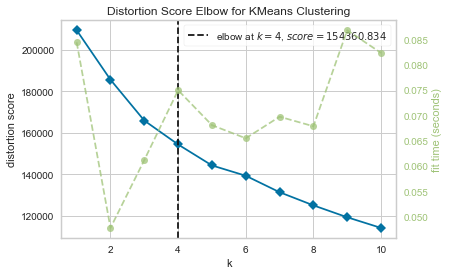

AxesSubplot(0.125,0.125;0.775x0.755)


In [9]:
km = KMeans(init='random', n_init='auto')
visualizer = KElbowVisualizer(km, k=(1,11))
visualizer.fit(scaled_df, y)
print(visualizer.show())

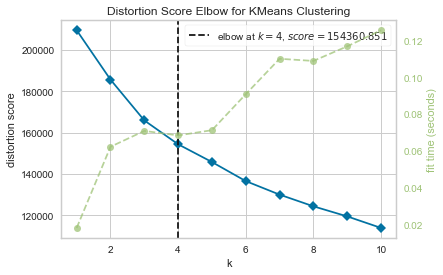

AxesSubplot(0.125,0.125;0.775x0.755)


In [10]:
km = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=42)
visualizer = KElbowVisualizer(km, k=(1,11))
visualizer.fit(scaled_df, y)
print(visualizer.show())

In [11]:
x = scaler.fit_transform(X)

In [12]:
km = KMeans(n_clusters=4, init='random', max_iter=300, n_init=10, random_state=42)
y_means = km.fit_predict(scaled_df)

In [41]:
scaled_df.loc[y_means == 0, ['PageValues']]

,PageValues
1,-0.317178
4,-0.317178
5,-0.317178
8,-0.317178
9,-0.317178
...,...
12324,-0.317178
12325,0.342125
12326,-0.317178
12327,-0.317178


In [21]:
scaled_df_orig = pd.DataFrame(scaler.inverse_transform(scaled_df), index=scaled_df.index, columns=scaled_df.columns)
scaled_df_orig

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,8.881784e-16,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,8.881784e-16,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,8.881784e-16,0.0,0.0,4.0,1.0,9.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,8.881784e-16,0.0,0.0,3.0,2.0,2.0,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,8.881784e-16,0.0,0.0,3.0,3.0,1.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,1.224172e+01,0.0,9.0,4.0,6.0,1.0,1.0,0.0,1.0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,8.881784e-16,0.0,7.0,3.0,2.0,1.0,8.0,0.0,1.0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,8.881784e-16,0.0,7.0,3.0,2.0,1.0,13.0,0.0,1.0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,8.881784e-16,0.0,7.0,2.0,2.0,3.0,11.0,0.0,0.0


In [24]:
scaled_df_orig['Revenue'] = y

In [37]:
y_means

array([3, 0, 3, ..., 0, 0, 2])

In [30]:
sns.color_palette()

[(0.00784313725490196, 0.4470588235294118, 0.6352941176470588),
 (0.6235294117647059, 0.7647058823529411, 0.4666666666666667),
 (0.792156862745098, 0.043137254901960784, 0.011764705882352941),
 (0.6470588235294118, 0.00784313725490196, 0.34509803921568627),
 (0.8431372549019608, 0.7803921568627451, 0.011764705882352941),
 (0.5333333333333333, 0.792156862745098, 0.8549019607843137)]

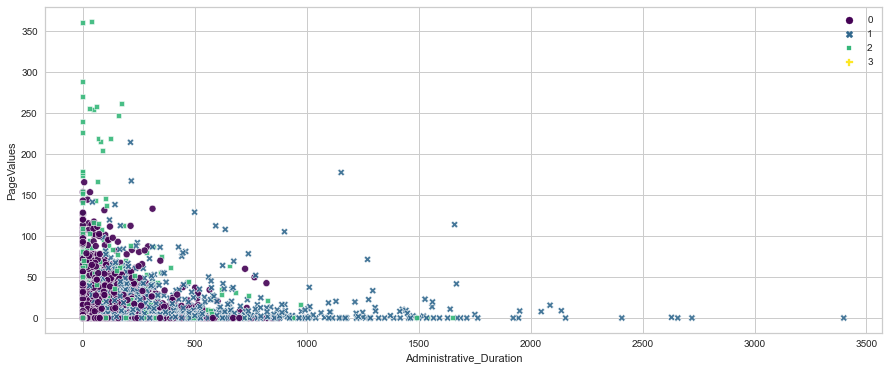

In [23]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=scaled_df_orig, x='Administrative_Duration', y='PageValues', hue=km.labels_,
                palette='viridis', cmap=True, style=km.labels_, alpha=0.9)
plt.show()

duration vs revenue hue kmeans

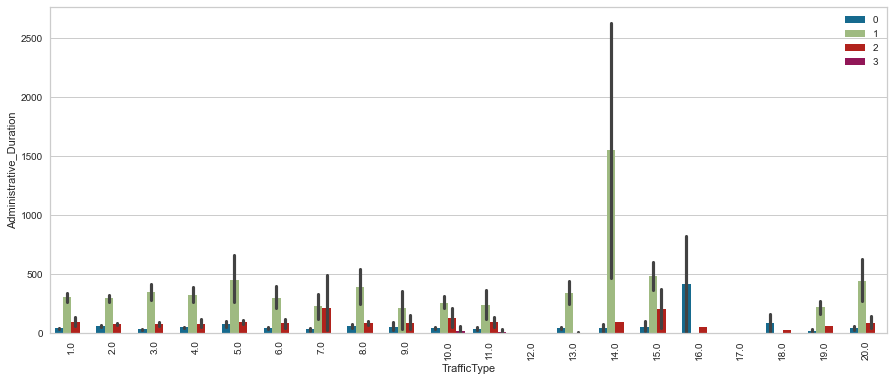

In [22]:
plt.figure(figsize=(15, 6))
sns.barplot(data=scaled_df_orig, y='Administrative_Duration', x='TrafficType', hue=km.labels_)
plt.xticks(rotation=90)
plt.show()

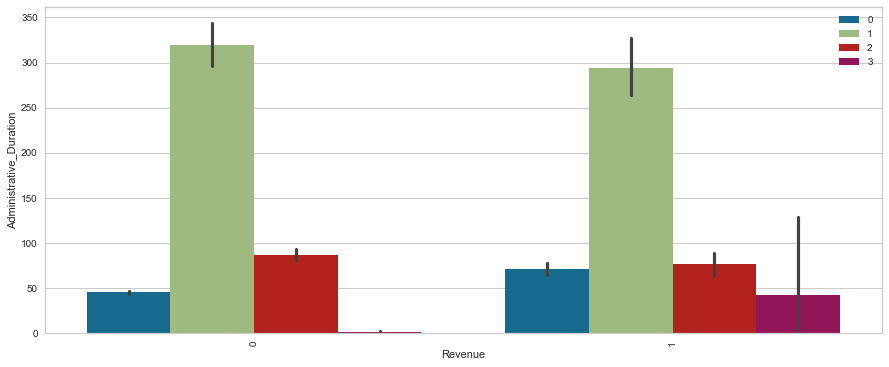

In [25]:
plt.figure(figsize=(15, 6))
sns.barplot(data=scaled_df_orig, y='Administrative_Duration', x='Revenue', hue=km.labels_)
plt.xticks(rotation=90)
plt.show()

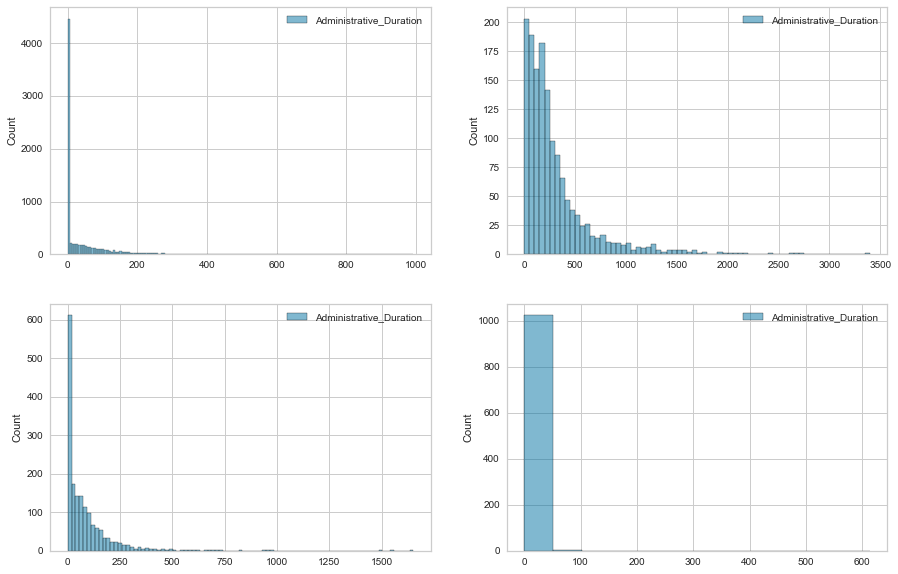

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(scaled_df_orig.loc[y_means==0, ['Administrative_Duration']], ax=ax[0][0])
sns.histplot(scaled_df_orig.loc[y_means==1, ['Administrative_Duration']], ax=ax[0][1])
sns.histplot(scaled_df_orig.loc[y_means==2, ['Administrative_Duration']], ax=ax[1][0])
sns.histplot(scaled_df_orig.loc[y_means==3, ['Administrative_Duration']], ax=ax[1][1])
plt.show()

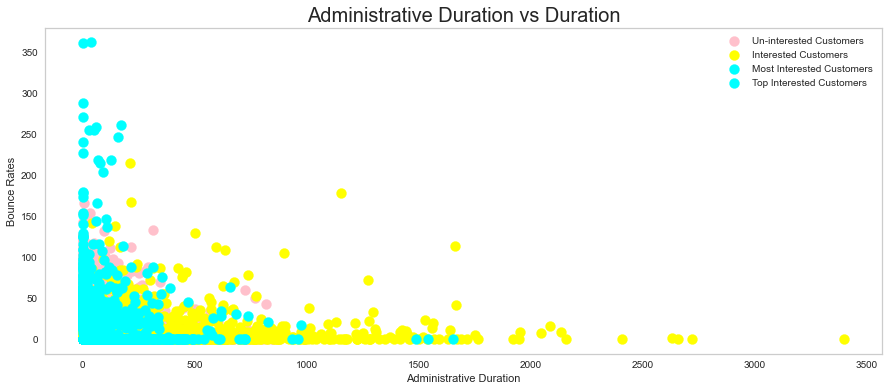

In [40]:
plt.figure(figsize=(15, 6))

plt.scatter(scaled_df_orig.loc[y_means==0, ['Administrative_Duration']], scaled_df_orig.loc[y_means==0, ['PageValues']], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(scaled_df_orig.loc[y_means==1, ['Administrative_Duration']], scaled_df_orig.loc[y_means==1, ['PageValues']], s = 100, c = 'yellow', label = 'Interested Customers')
plt.scatter(scaled_df_orig.loc[y_means==2, ['Administrative_Duration']], scaled_df_orig.loc[y_means==2, ['PageValues']], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(scaled_df_orig.loc[y_means==3, ['Administrative_Duration']], scaled_df_orig.loc[y_means==3, ['PageValues']], s = 100, c = 'cyan', label = 'Top Interested Customers')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [42]:
scaled_df_orig['kmeans'] = y_means
scaled_df_orig

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,kmeans
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,8.881784e-16,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,3
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,8.881784e-16,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,8.881784e-16,0.0,0.0,4.0,1.0,9.0,3.0,0.0,0.0,0,3
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,8.881784e-16,0.0,0.0,3.0,2.0,2.0,4.0,0.0,0.0,0,3
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,8.881784e-16,0.0,0.0,3.0,3.0,1.0,4.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,1.224172e+01,0.0,9.0,4.0,6.0,1.0,1.0,0.0,1.0,0,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,8.881784e-16,0.0,7.0,3.0,2.0,1.0,8.0,0.0,1.0,0,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,8.881784e-16,0.0,7.0,3.0,2.0,1.0,13.0,0.0,1.0,0,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,8.881784e-16,0.0,7.0,2.0,2.0,3.0,11.0,0.0,0.0,0,0


In [43]:
scaled_df_orig.groupby('kmeans')['Revenue'].value_counts()

kmeans  Revenue
0       0          7068
        1          1059
1       0          1059
        1           405
2       0          1272
        1           438
3       0          1023
        1             6
Name: Revenue, dtype: int64

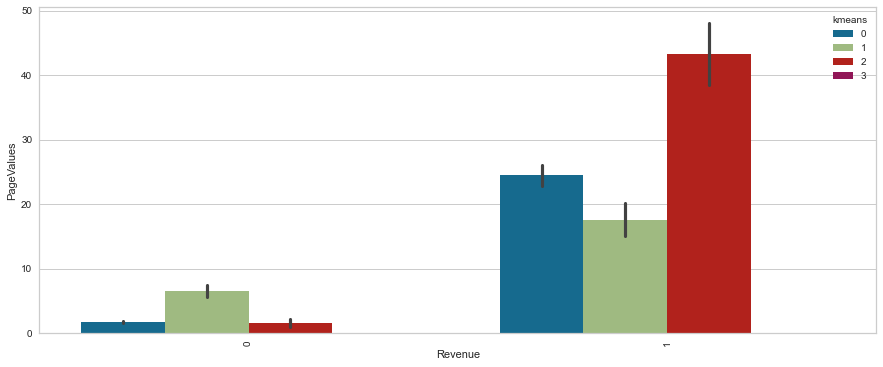

In [44]:
plt.figure(figsize=(15, 6))
sns.barplot(data=scaled_df_orig, x='Revenue', y='PageValues', hue='kmeans')
plt.xticks(rotation=90)
plt.show()

In [46]:
scaled_df_orig.groupby('kmeans')['PageValues'].agg(['size'])

,size
kmeans,
0,8127
1,1464
2,1710
3,1029


In [48]:
scaled_df_orig.groupby('kmeans')['PageValues'].value_counts()

kmeans  PageValues  
0       8.881784e-16    6628
        9.084768e+00       2
        1.099902e+01       2
        1.255886e+01       2
        1.539560e+01       2
                        ... 
2       2.707847e+02       1
        2.879538e+02       1
        3.609534e+02       1
        3.617637e+02       1
3       8.881784e-16    1029
Name: PageValues, Length: 2717, dtype: int64

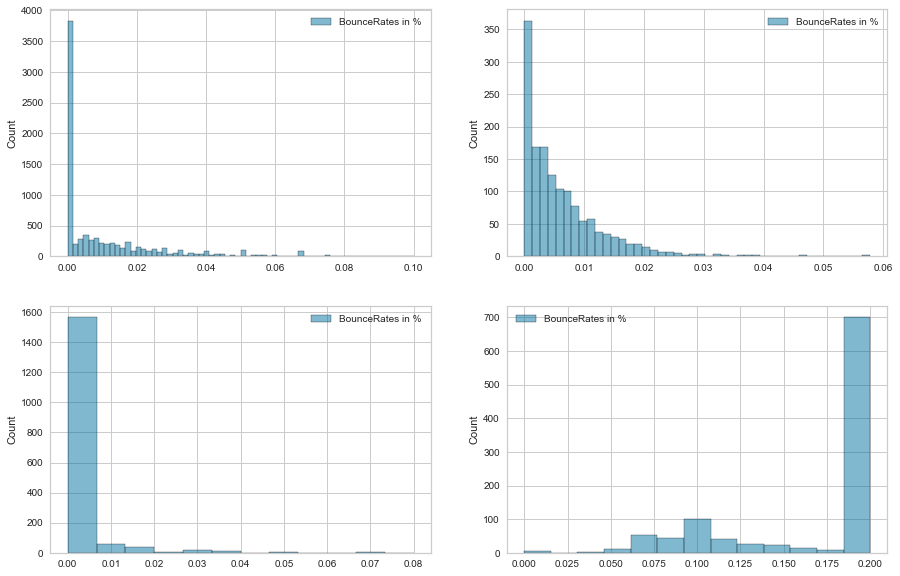

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(scaled_df_orig.loc[y_means==0, ['BounceRates in %']], ax=ax[0][0])
sns.histplot(scaled_df_orig.loc[y_means==1, ['BounceRates in %']], ax=ax[0][1])
sns.histplot(scaled_df_orig.loc[y_means==2, ['BounceRates in %']], ax=ax[1][0])
sns.histplot(scaled_df_orig.loc[y_means==3, ['BounceRates in %']], ax=ax[1][1])
plt.show()

In [78]:
km.cluster_centers_[:,4]

array([-0.13795584,  1.58986226, -0.31652599, -0.64540032])

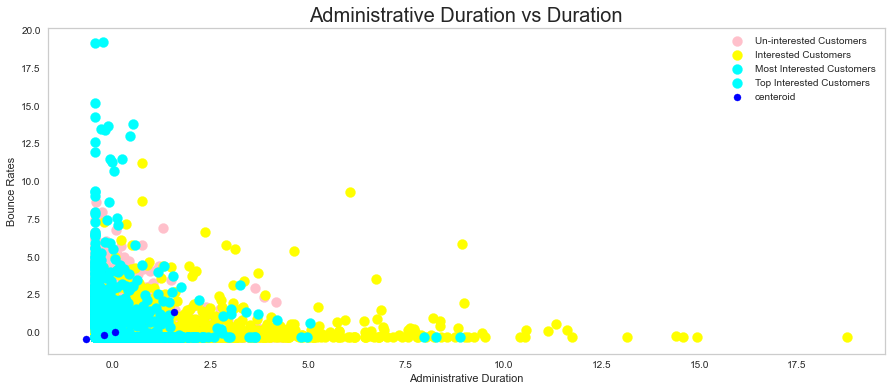

In [81]:
plt.figure(figsize=(15, 6))

plt.scatter(scaled_df.loc[y_means==0, ['Administrative_Duration']], scaled_df.loc[y_means==0, ['PageValues']], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(scaled_df.loc[y_means==1, ['Administrative_Duration']], scaled_df.loc[y_means==1, ['PageValues']], s = 100, c = 'yellow', label = 'Interested Customers')
plt.scatter(scaled_df.loc[y_means==2, ['Administrative_Duration']], scaled_df.loc[y_means==2, ['PageValues']], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(scaled_df.loc[y_means==3, ['Administrative_Duration']], scaled_df.loc[y_means==3, ['PageValues']], s = 100, c = 'cyan', label = 'Top Interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Revenue'>

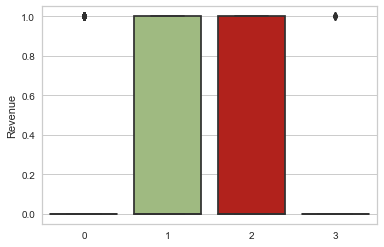

In [46]:
sns.boxplot(x=km.labels_, y=df['Revenue'])

<AxesSubplot:xlabel='Revenue', ylabel='count'>

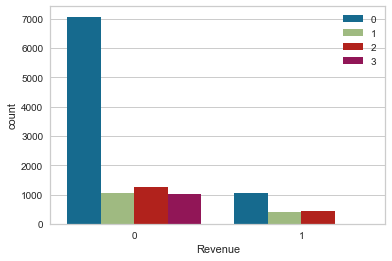

In [47]:
sns.countplot(hue=km.labels_, x=df['Revenue'])

<AxesSubplot:xlabel='Revenue'>

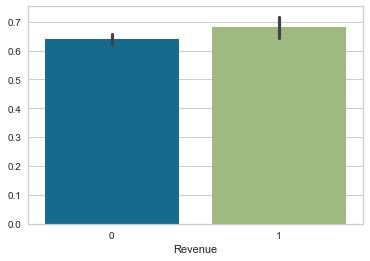

In [50]:
sns.barplot(y=km.labels_, x=df['Revenue'])

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

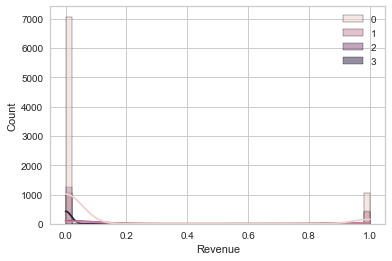

In [53]:
sns.histplot(hue=km.labels_, x=df['Revenue'], kde=True, bins=50)

In [54]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,1,1,1,0,0,0


In [65]:
scaled_df_orig = pd.DataFrame(scaler.inverse_transform(scaled_df), index=scaled_df.index, columns=scaled_df.columns)
scaled_df_orig

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,8.881784e-16,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,8.881784e-16,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,8.881784e-16,0.0,0.0,4.0,1.0,9.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,8.881784e-16,0.0,0.0,3.0,2.0,2.0,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,8.881784e-16,0.0,0.0,3.0,3.0,1.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,1.224172e+01,0.0,9.0,4.0,6.0,1.0,1.0,0.0,1.0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,8.881784e-16,0.0,7.0,3.0,2.0,1.0,8.0,0.0,1.0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,8.881784e-16,0.0,7.0,3.0,2.0,1.0,13.0,0.0,1.0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,8.881784e-16,0.0,7.0,2.0,2.0,3.0,11.0,0.0,0.0


In [66]:
scaled_df_orig.loc[y_means==0, ['Administrative_Duration']].describe()

,Administrative_Duration
count,8127.000000
mean,48.538532
std,92.628703
min,0.000000
25%,0.000000
50%,0.000000
75%,62.500000
max,993.000000


In [67]:
scaled_df_orig.loc[y_means==1, ['Administrative_Duration']].describe()

,Administrative_Duration
count,1464.000000
mean,312.437428
std,363.372866
min,0.000000
25%,92.892857
50%,199.223136
75%,378.009615
max,3398.750000


In [68]:
scaled_df_orig.loc[y_means==2, ['Administrative_Duration']].describe()

,Administrative_Duration
count,1710.000000
mean,83.739273
std,128.863719
min,0.000000
25%,0.000000
50%,47.000000
75%,111.000000
max,1652.000000


In [69]:
scaled_df_orig.loc[y_means==3, ['Administrative_Duration']].describe()

,Administrative_Duration
count,1029.000000
mean,1.378296
std,22.054678
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,613.666667


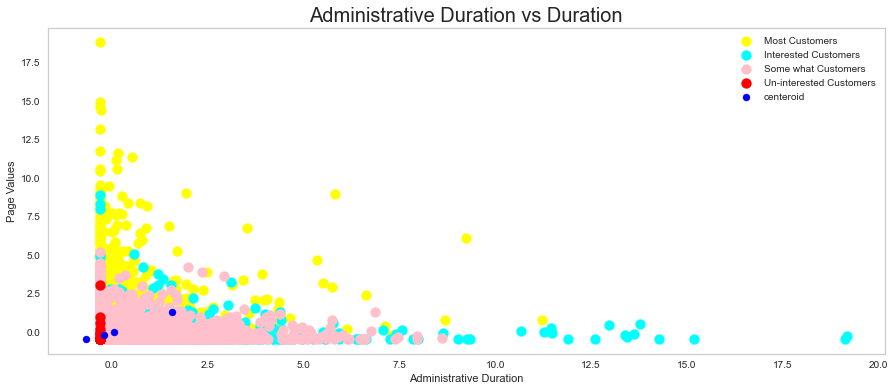

In [87]:
plt.figure(figsize=(15, 6))

plt.scatter(y=scaled_df.loc[y_means==1, ['Administrative_Duration']], x=scaled_df.loc[y_means==1, ['PageValues']], s = 100, c = 'yellow', label = 'Most Customers')
plt.scatter(y=scaled_df.loc[y_means==2, ['Administrative_Duration']], x=scaled_df.loc[y_means==2, ['PageValues']], s = 100, c = 'cyan', label = 'Interested Customers')
plt.scatter(y=scaled_df.loc[y_means==0, ['Administrative_Duration']], x=scaled_df.loc[y_means==0, ['PageValues']], s = 100, c = 'pink', label = 'Some what Customers')
plt.scatter(y=scaled_df.loc[y_means==3, ['Administrative_Duration']], x=scaled_df.loc[y_means==3, ['PageValues']], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Page Values')
plt.legend()
plt.show()

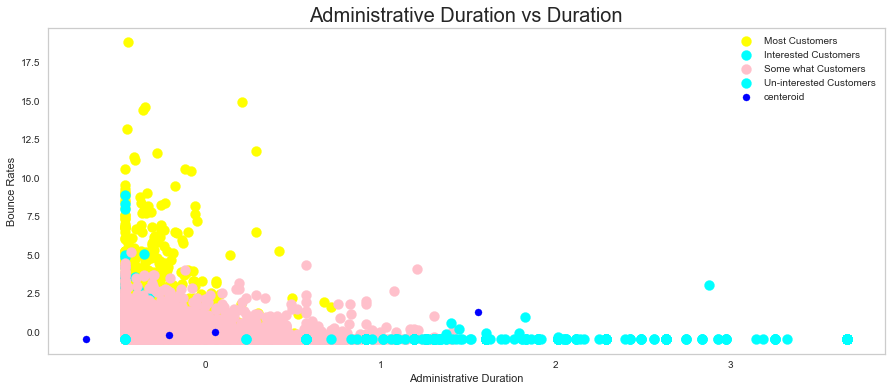

In [85]:
plt.figure(figsize=(15, 6))

plt.scatter(y=scaled_df.loc[y_means==1, ['Administrative_Duration']], x=scaled_df.loc[y_means==1, ['BounceRates in %']], s = 100, c = 'yellow', label = 'Most Customers')
plt.scatter(y=scaled_df.loc[y_means==2, ['Administrative_Duration']], x=scaled_df.loc[y_means==2, ['BounceRates in %']], s = 100, c = 'cyan', label = 'Interested Customers')
plt.scatter(y=scaled_df.loc[y_means==0, ['Administrative_Duration']], x=scaled_df.loc[y_means==0, ['BounceRates in %']], s = 100, c = 'pink', label = 'Some what Customers')
plt.scatter(y=scaled_df.loc[y_means==3, ['Administrative_Duration']], x=scaled_df.loc[y_means==3, ['BounceRates in %']], s = 100, c = 'cyan', label = 'Un-interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

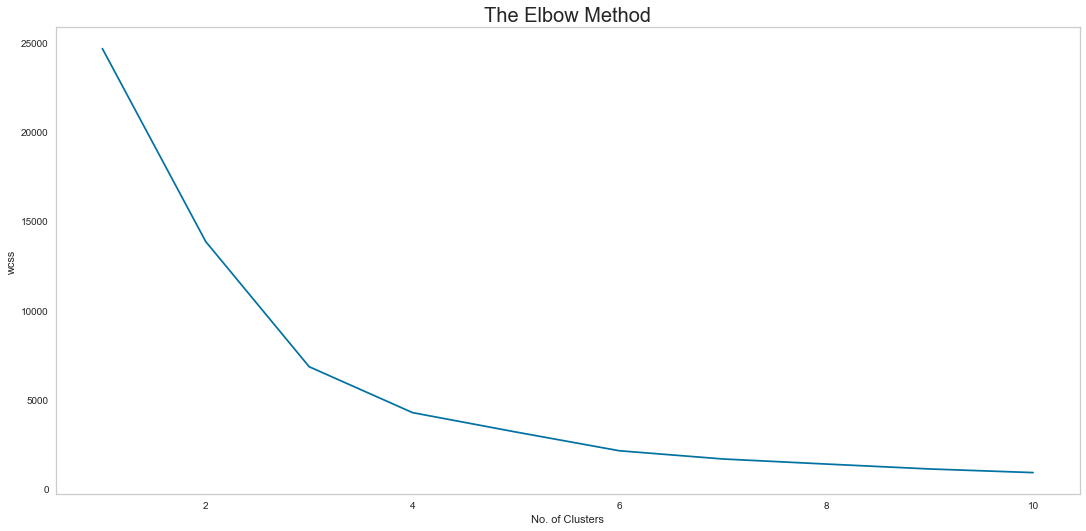

In [90]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = scaled_df.loc[:, ['Administrative_Duration', 'BounceRates in %']].values

# checking the shape of the dataset
x.shape

# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

#Inertia(intra-distance from the centroid):sum of squared distance btw members of cluster & its centroid
#n_cluster:no. of clusters,random_state:so take same random values and the prediction remain same,
#max_iter:Maximum number of iterations of the k-means algorithm for a single run.
#init:selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42,
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
# Visualizing the elbow method    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [91]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

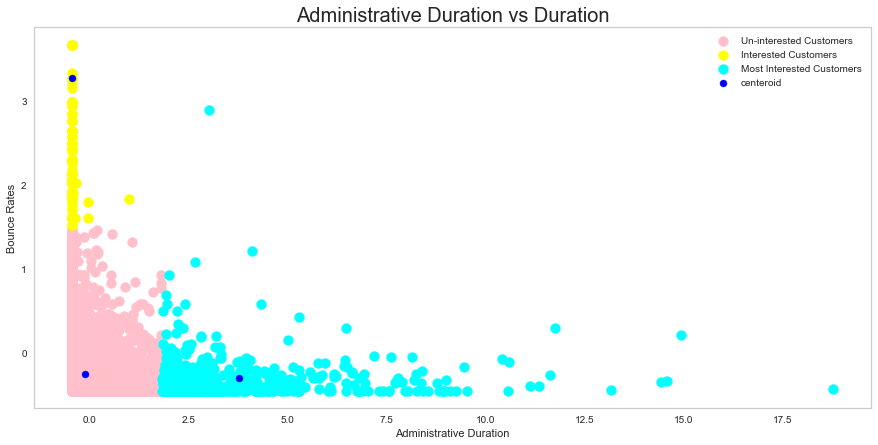

In [92]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Interested Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

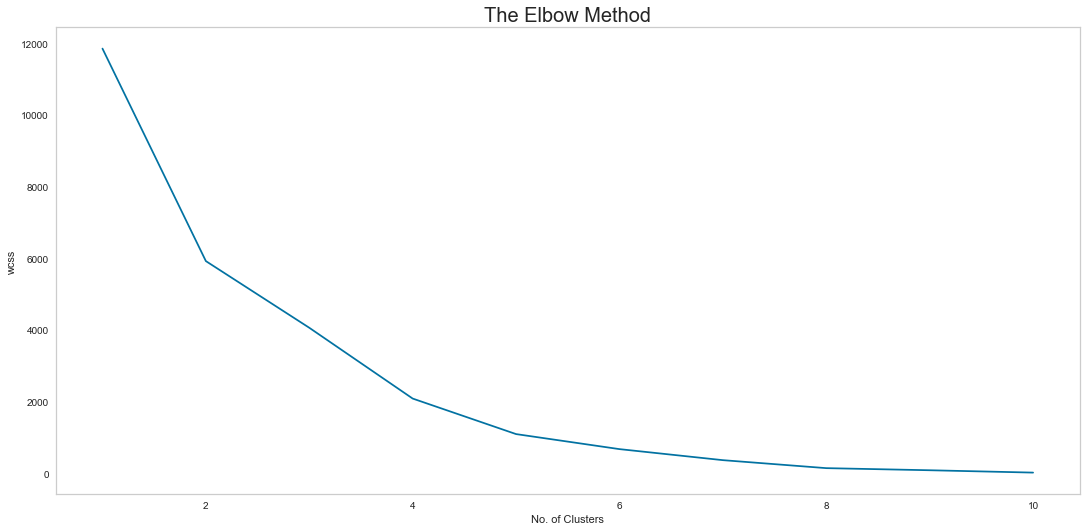

In [103]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = df.loc[:, ['OperatingSystems', 'Revenue']].values

# checking the shape of the dataset
x.shape

# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

#Inertia(intra-distance from the centroid):sum of squared distance btw members of cluster & its centroid
#n_cluster:no. of clusters,random_state:so take same random values and the prediction remain same,
#max_iter:Maximum number of iterations of the k-means algorithm for a single run.
#init:selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42,
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
# Visualizing the elbow method    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [104]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

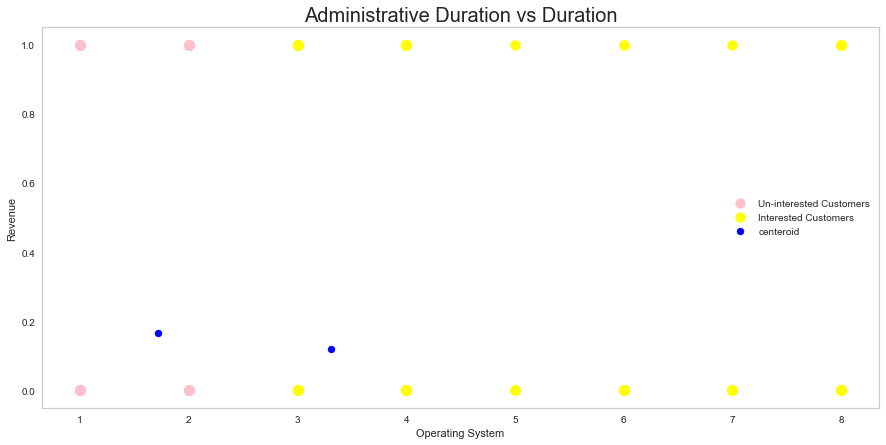

In [106]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Interested Customers')
#plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Operating System')
plt.ylabel('Revenue')
plt.legend()
plt.show()

<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

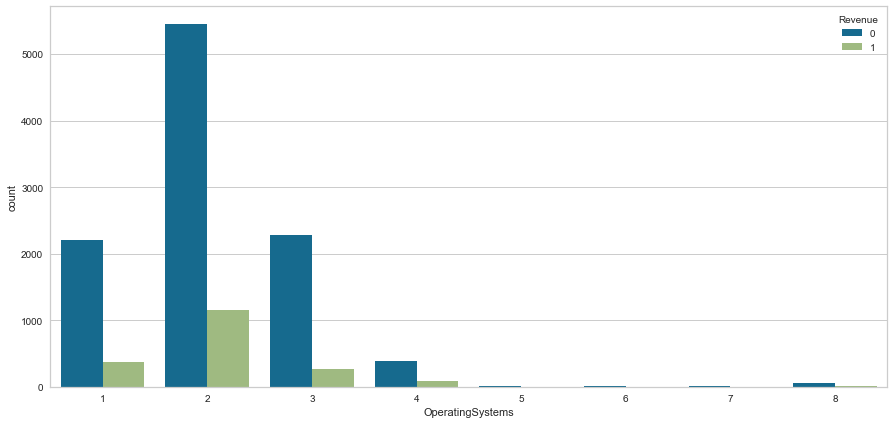

In [108]:
sns.countplot(data=df, x='OperatingSystems', hue='Revenue')

<AxesSubplot:xlabel='OperatingSystems', ylabel='Revenue'>

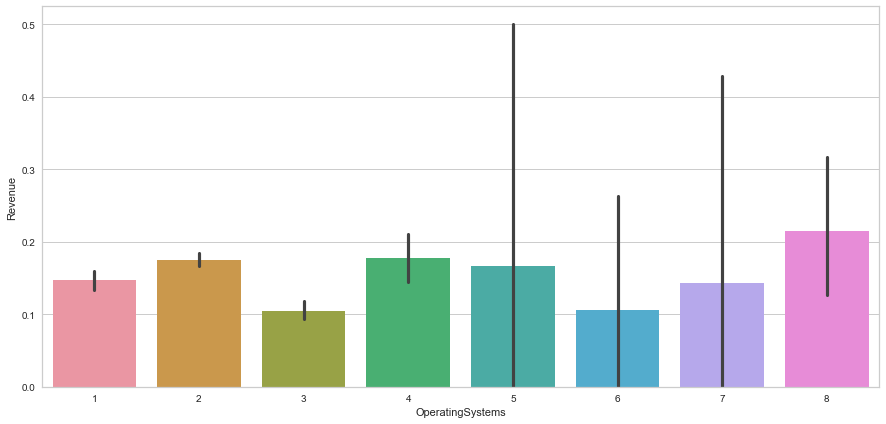

In [107]:
sns.barplot(data=df, x='OperatingSystems', y='Revenue')

In [111]:
df.groupby('Region')['Revenue'].mean().sort_values(ascending=False).pct_change()

Region
9         NaN
2   -0.016664
5   -0.011910
1   -0.013606
7   -0.030527
4   -0.053200
3   -0.019040
6   -0.042033
8   -0.072581
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Region', ylabel='Revenue'>

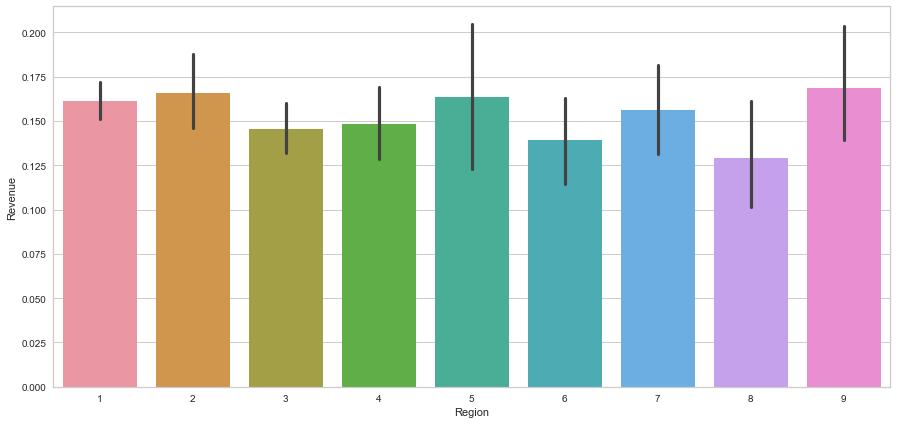

In [112]:
sns.barplot(data=df, x='Region', y='Revenue')

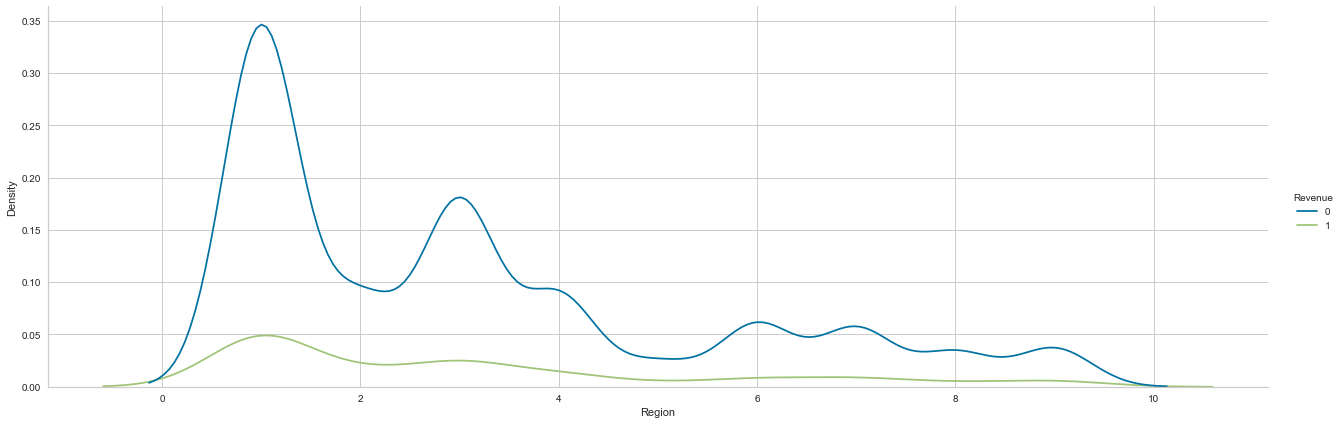

In [125]:
sns.displot(x=df['Region'], hue=df['Revenue'], kind='kde', height=6, aspect=3)

<AxesSubplot:xlabel='Region', ylabel='count'>

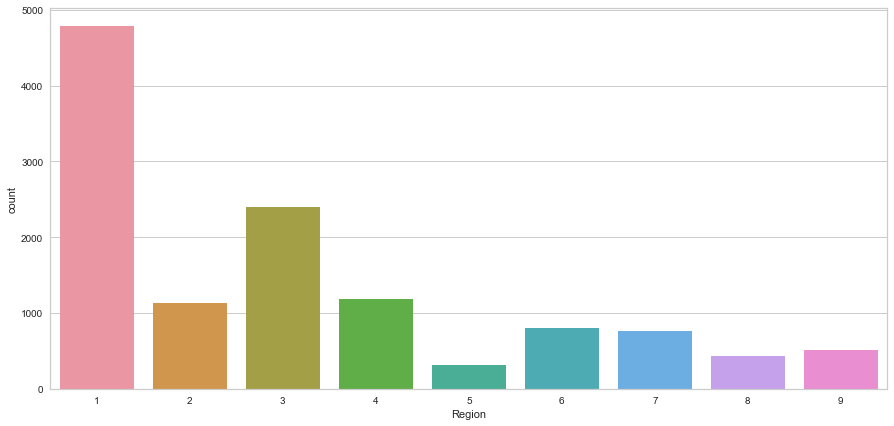

In [114]:
sns.countplot(data=df, x='Region')

<AxesSubplot:xlabel='Region', ylabel='count'>

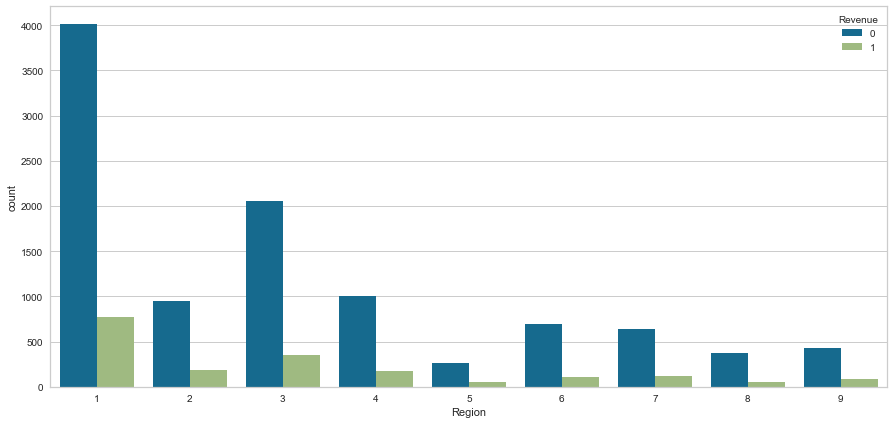

In [113]:
sns.countplot(data=df, x='Region', hue='Revenue')

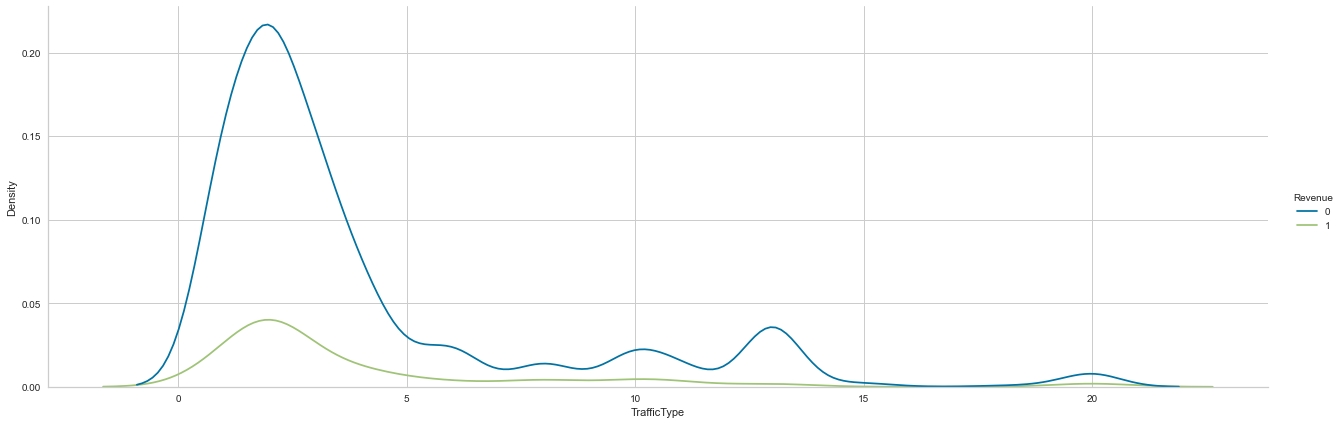

In [126]:
sns.displot(x=df['TrafficType'], hue=df['Revenue'], kind='kde', height=6, aspect=3)

<AxesSubplot:xlabel='TrafficType', ylabel='Revenue'>

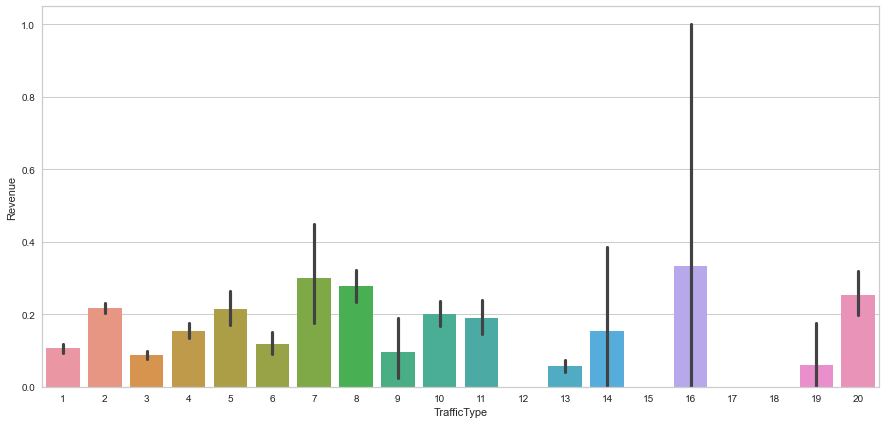

In [127]:
sns.barplot(data=df, x='TrafficType', y='Revenue')

In [129]:
df.groupby('TrafficType')['Revenue'].value_counts().sort_values(ascending=False)

TrafficType  Revenue
2            0          3066
1            0          2189
3            0          1872
4            0           904
2            1           847
13           0           695
6            0           391
10           0           360
1            1           262
8            0           248
5            0           204
11           0           200
3            1           180
4            1           165
20           0           148
8            1            95
10           1            90
5            1            56
6            1            53
20           1            50
11           1            47
13           1            43
9            0            38
15           0            38
7            0            28
19           0            16
7            1            12
14           0            11
18           0            10
9            1             4
14           1             2
16           0             2
             1             1
17           0        

In [1]:
sns.barplot(data=df, x='TrafficType', y='BounceRates in %', col='Revenue', style='Revenue', height=6, kind='line')

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='TrafficType', ylabel='BounceRates in %'>

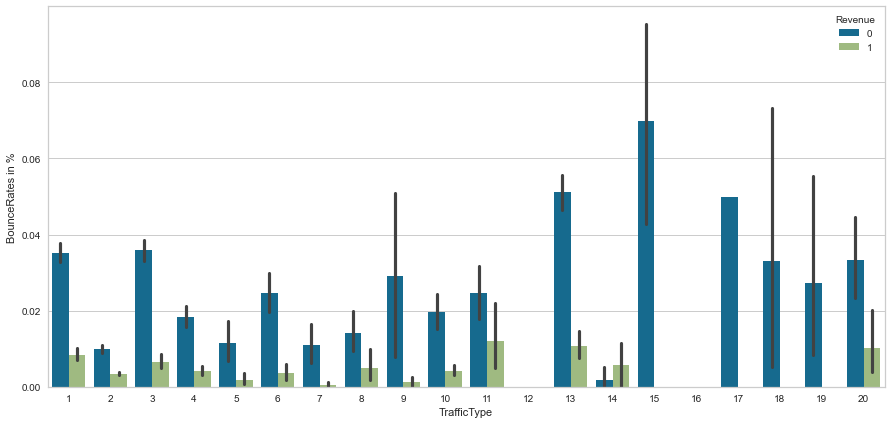

In [142]:
sns.barplot(data=df, x='TrafficType', y='BounceRates in %', hue='Revenue')

In [39]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False


<AxesSubplot:xlabel='Administrative'>

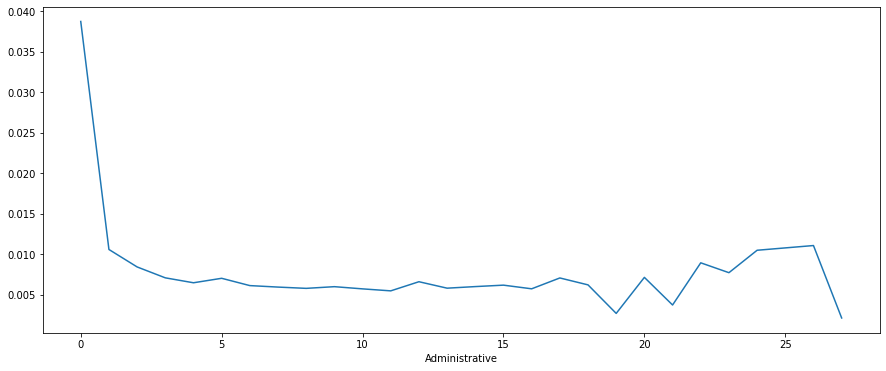

In [41]:
df.groupby('Administrative')['BounceRates in %'].mean().plot(figsize=(15, 6))

<AxesSubplot:xlabel='Informational'>

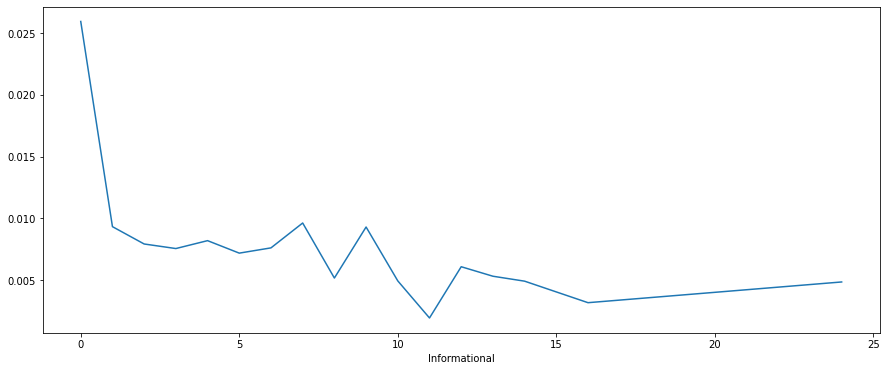

In [42]:
df.groupby('Informational')['BounceRates in %'].mean().plot(figsize=(15, 6))

<AxesSubplot:xlabel='ProductRelated'>

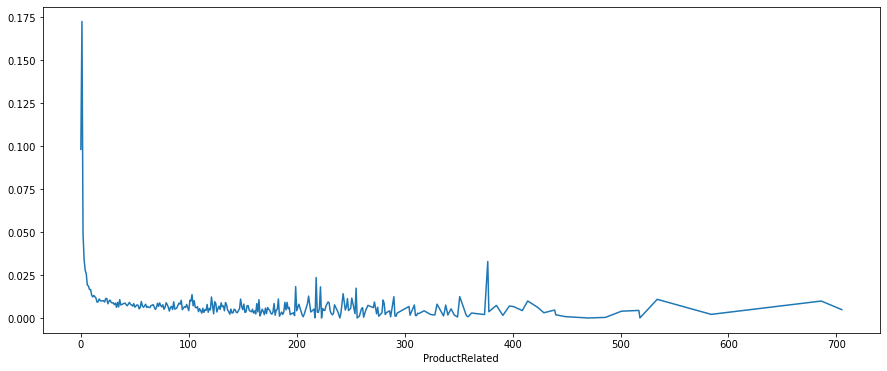

In [43]:
df.groupby('ProductRelated')['BounceRates in %'].mean().plot(figsize=(15, 6))

In [64]:
df.groupby('Region')['Revenue'].value_counts(normalize=True)

Region  Revenue
1       False      0.838703
        True       0.161297
2       False      0.834507
        True       0.165493
3       False      0.854765
        True       0.145235
4       False      0.851946
        True       0.148054
5       False      0.836478
        True       0.163522
6       False      0.860870
        True       0.139130
7       False      0.843627
        True       0.156373
8       False      0.870968
        True       0.129032
9       False      0.831703
        True       0.168297
Name: Revenue, dtype: float64